# Exploring and Preparing Loan Data

## Understanding credit risk

### Data Exploration
The initial step involves examining the `cr_loan` dataset. This dataset includes a column named `loan_status`, which indicates whether a loan is currently in default (1 for default, 0 for non-default).

The dataset contains multiple columns, many of which may have relationships with `loan_status`. A thorough exploration and analysis of these relationships are necessary to understand their impact on credit loan defaults.

To gain insights into the dataset, it is essential to check its structure and view a snapshot of the data. Additionally, visualizations can provide a high-level overview of the data, highlighting important trends and patterns.

The `cr_loan` dataset has been preloaded into the workspace for this analysis.

In [33]:
# Import pandas, matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Import datasets
cr_loan = pd.read_csv('https://assets.datacamp.com/production/repositories/4876/datasets/a2d8510b4aec8d0ac14ab9bee61ba3c085805967/cr_loan2.csv')

In [4]:
# Check the structure of the data
print(cr_loan.dtypes)

# Check the first five rows of the data
print(cr_loan.head())

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
   person_age  ...  cb_person_cred_hist_length
0          22  ...                           3
1          21  ...                           2
2          25  ...                           3
3          23  ...                           2
4          24  ...                           4

[5 rows x 12 columns]


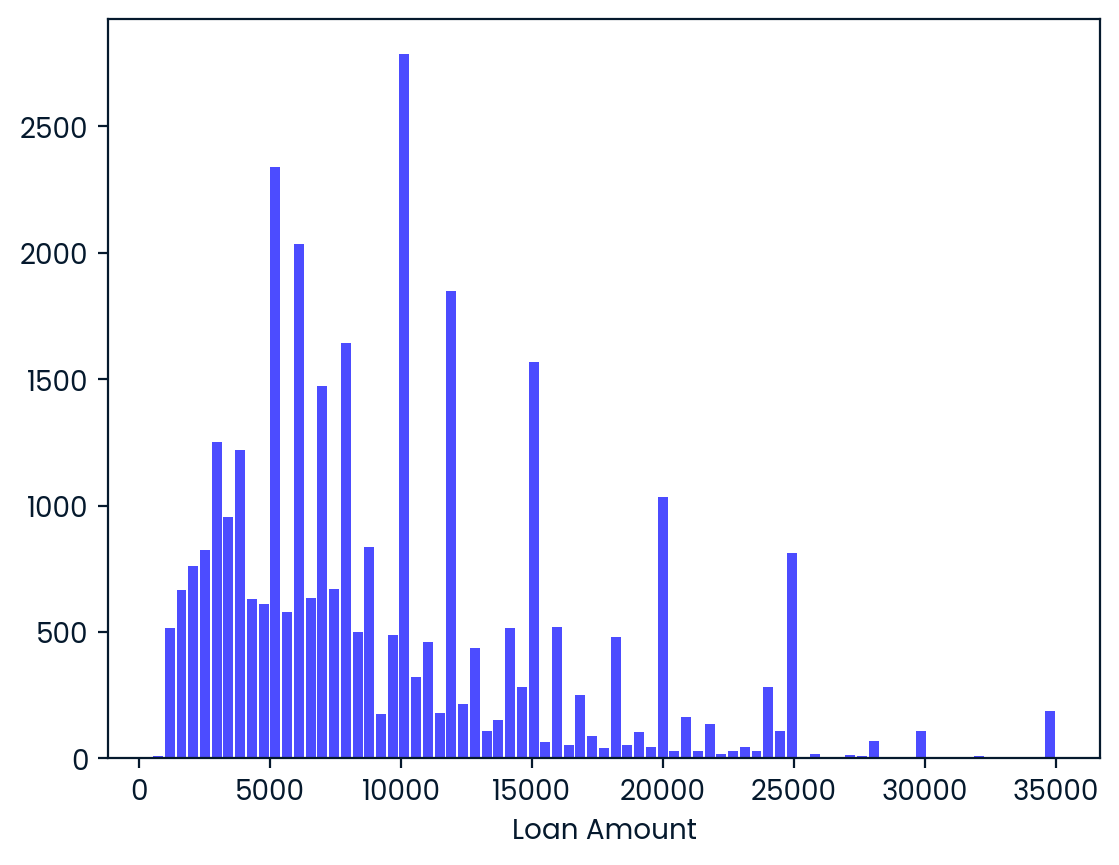

In [7]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

There are 32 000 rows of data so the scatter plot may take a little while to plot.


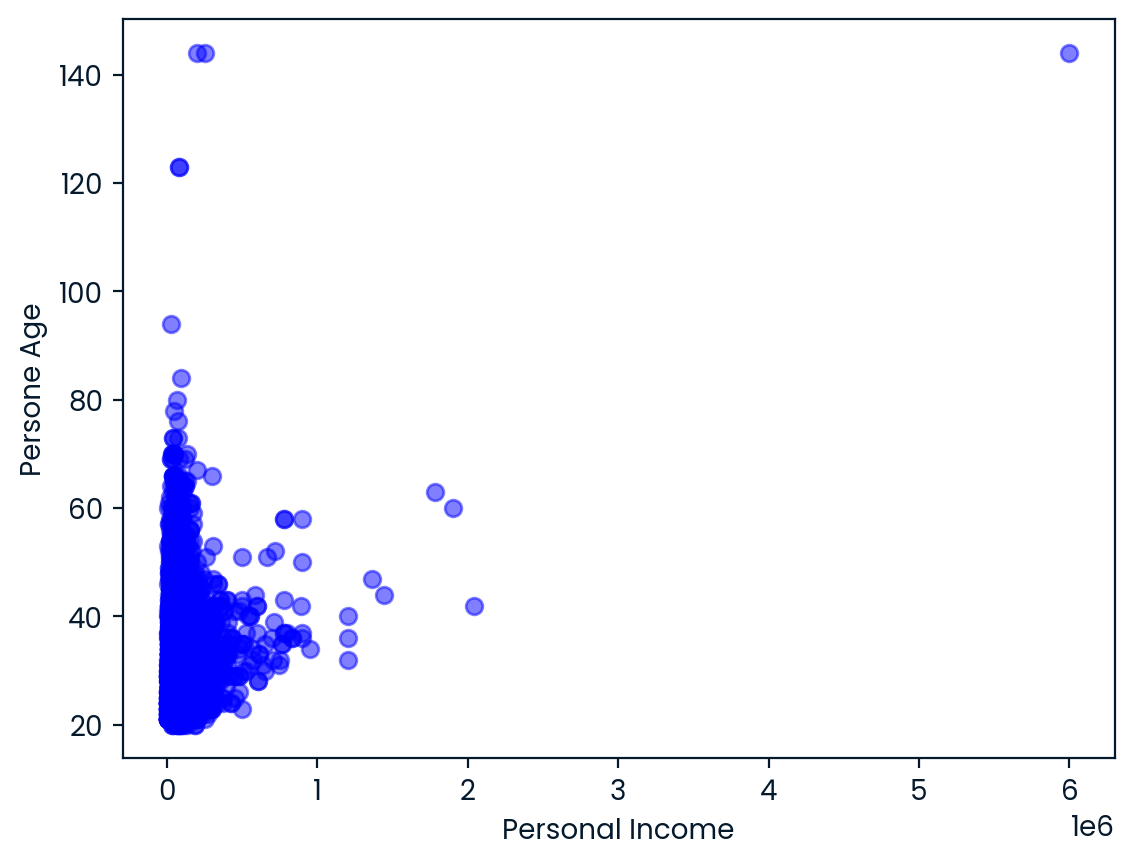

In [8]:
print("There are 32 000 rows of data so the scatter plot may take a little while to plot.")

# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

### Crosstab and Pivot Tables
Financial data is often analyzed using pivot tables in spreadsheet applications like Excel. Crosstab tables provide a high-level view of selected columns and allow for aggregations such as counts or averages.

In credit risk modeling, particularly for assessing the probability of default, it is common to investigate columns such as `person_emp_length` and p`erson_home_ownership`. These analyses help in understanding how values are distributed across the dataset and in visualizing these distributions.

For this analysis, it is important to examine how loan_status is influenced by factors such as home ownership status, loan grade, and loan percentage of income.

The `cr_loan` dataset has been preloaded into the workspace for this purpose.

In [9]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [10]:
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                        ...    1                   
loan_grade                A     B     C    D    E  ...    C     D    E   F   G
person_home_ownership                              ...                        
MORTGAGE               5219  3729  1934  658  178  ...  321   553  161  61  31
OTHER                    23    29    11    9    2  ...    6    11    6   2   0
OWN                     860   770   464  264   26  ...   31    18   31   8   5
RENT                   3602  4222  2710  554  137  ...  981  1559  423  99  27

[4 rows x 14 columns]


In [11]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'], values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


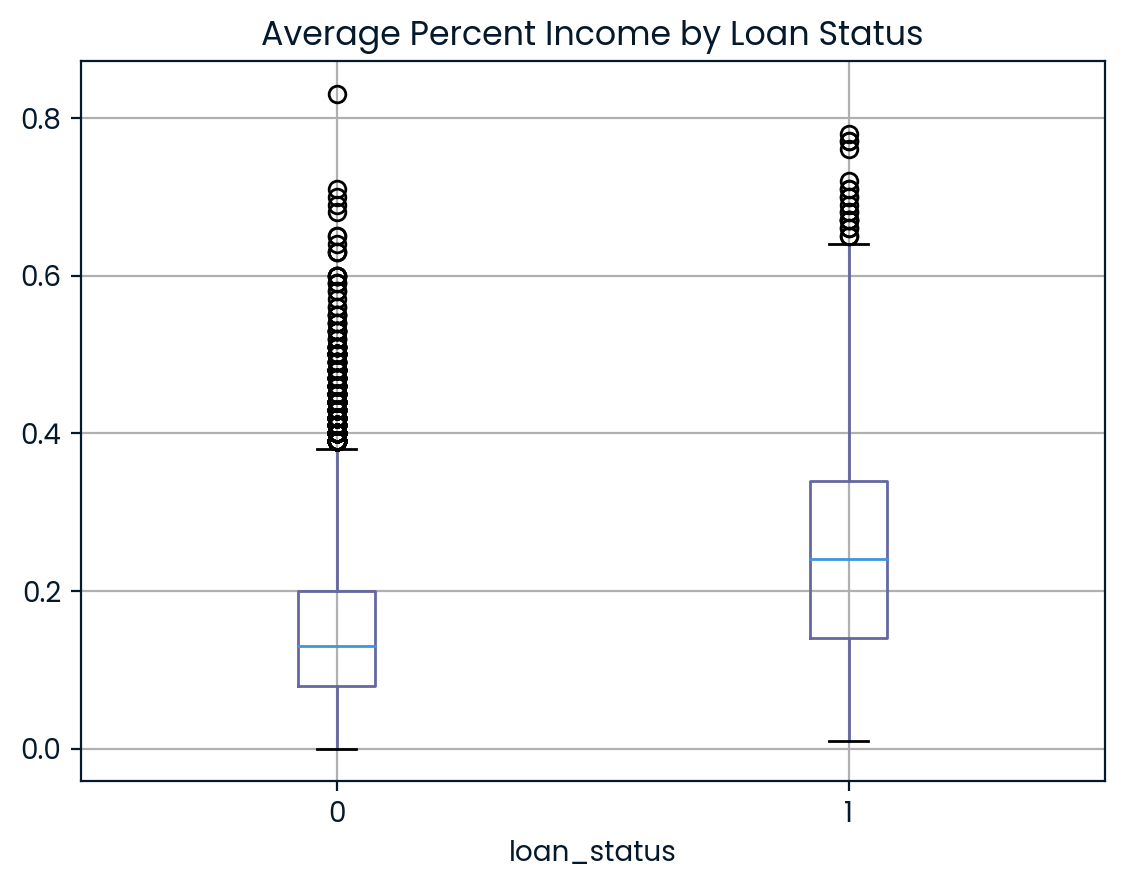

In [12]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

## Outliers in credit data

### Identifying Outliers with Crosstab Tables
To ensure data quality, it is essential to identify and remove any outliers that may be present. Crosstab tables and aggregate functions can be useful tools for this task.

Focus on the person_emp_length column. While the `aggfunc = 'mean'` argument is commonly used to calculate the average of a numeric column, other functions such as min and max can be employed to detect outliers.

For instance, it is unlikely for a person to have an employment length of less than 0 or greater than 60 years. By using crosstab tables, you can examine the data to identify any such anomalies.

In [34]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

# Create the cross table from earlier and include minimum employment length
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0
                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


### Visualizing Credit Outliers
Outliers were identified in the `person_emp_length` column, where values exceeding 60 years were significantly above the norm. Similarly, the `person_age` column can be examined using a common-sense approach, as it is highly unlikely for a loan applicant to be over 100 years old.

Visualizing the data is an effective method for detecting outliers. By creating plots with person_age and other numeric columns such as `loan_amnt` and `loan_int_rate`, you can easily identify anomalies.

The `cr_loan` dataset has been preloaded into the workspace for this analysis.

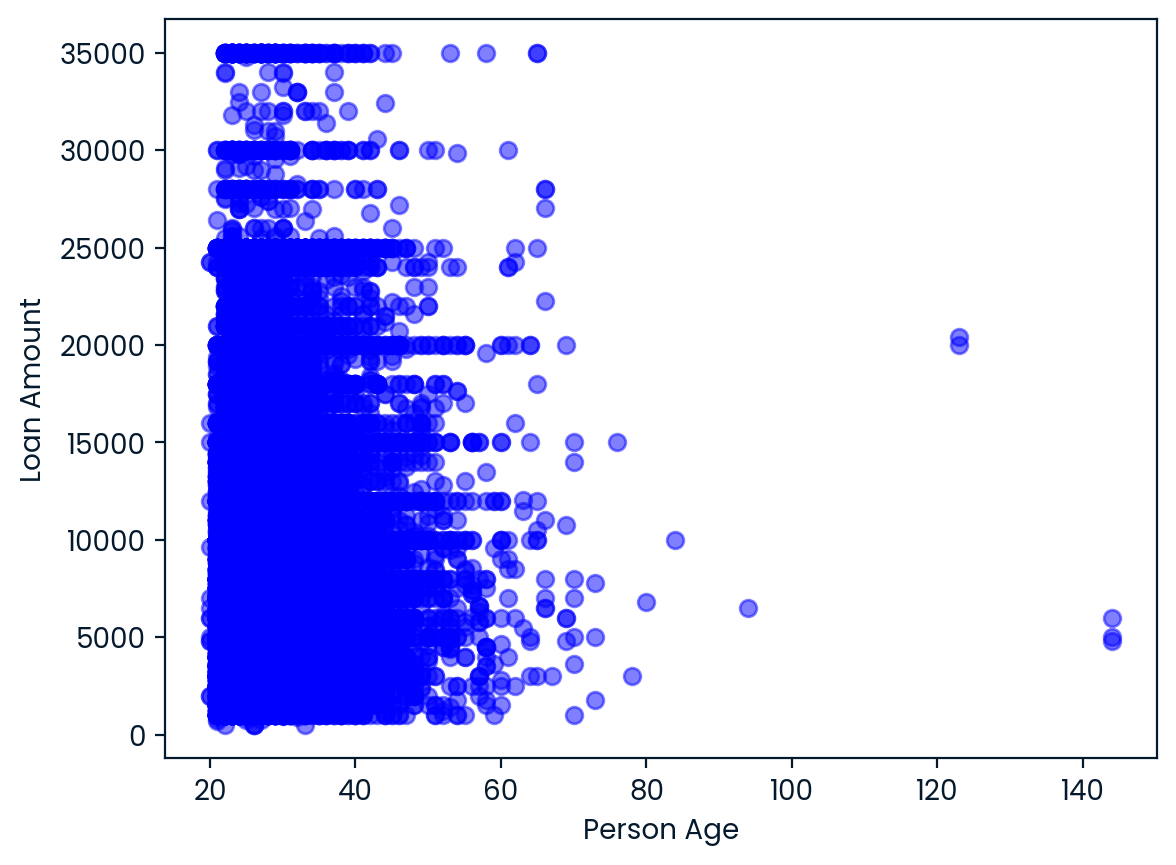

In [35]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

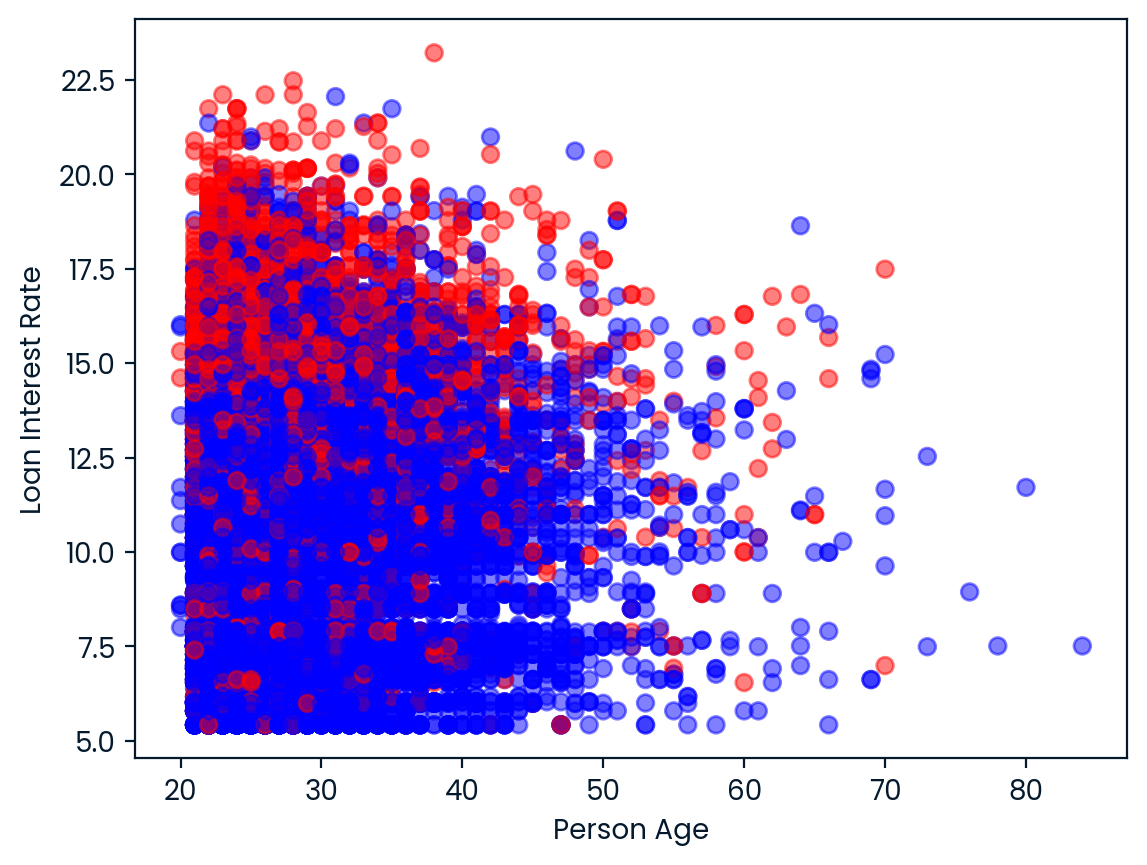

In [36]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

## Risk with missing data in loan data

### Handling Missing Credit Data
It is crucial to check for and address any missing data in the dataset. Missing values in the `loan_status` column would render the data unusable for predicting the probability of default, as the default status of the loan would be unknown. While missing data in the `person_emp_length` column is less critical, it can still lead to training errors.

To ensure data integrity, examine the `person_emp_length` column for any missing values and replace them with the median value.

The `cr_loan` dataset has been preloaded into the workspace for this analysis.

In [37]:
cr_loan = pd.read_csv("https://assets.datacamp.com/production/repositories/4876/datasets/924778a93a2a2b95af4824ca4e7d9ddea346410a/cr_loan_no_out.csv")

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  ...  cb_person_cred_hist_length
103          22  ...                           4
218          24  ...                           2
375          24  ...                           3
403          25  ...                           2
404          22  ...                           3

[5 rows x 12 columns]


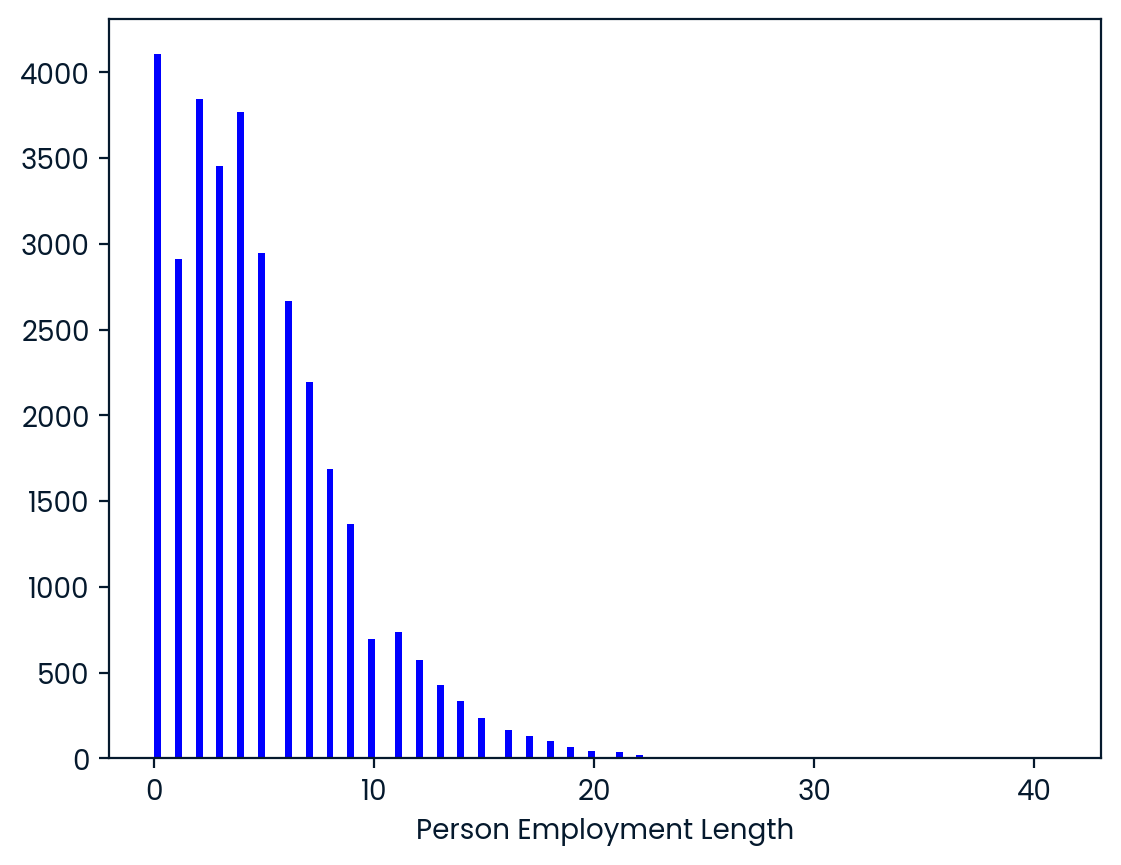

In [38]:
# Print a null value column array
print(cr_loan.columns[cr_loan.isnull().any()])

# Print the top five rows with nulls for employment length
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

### Removing Missing Data
After replacing missing values in the `person_emp_length` column, it was observed that the `loan_int_rate` column also contains missing data. Similar to `loan_status`, missing values in `loan_int_rate` can complicate predictions.

Given that interest rates are set by the company, missing data in this column is unusual and may indicate data ingestion issues. To ensure the integrity of the analysis, it is advisable to drop these records before proceeding.

The `cr_loan` dataset has been preloaded into the workspace for this analysis.

In [39]:
# Print the number of nulls
print(cr_loan['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)
print(cr_loan_clean['loan_int_rate'].isnull().sum())

3115
0


### Handling Missing Data: Intuition Check
When dealing with missing data, there are three primary options: keep, replace, or remove the missing values.

So far, the focus has been on numeric columns, but how should missing data in a non-numeric column, such as `person_home_ownership`, be handled? This column contains string values, which require a different approach.

The `ownership_table` object has been created to show the count of records for each unique value in the `person_home_ownership` column using the following code:

```python
# Count the number of records for each unique value
cr_loan['person_home_ownership'].value_counts()
```

Both `ownership_table` and `cr_loan` are preloaded into the workspace for this analysis.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cr_loan = pd.read_csv("https://assets.datacamp.com/production/repositories/4876/datasets/3670f1010364b1ee85c6c02d14af6ac31156d850/cr_loan_no_out_intuition.csv")

ownership_table = cr_loan['person_home_ownership'].value_counts(dropna = False)
print(ownership_table)

# Count the number of records for each unique value
print(cr_loan['person_home_ownership'].value_counts())

# Replace missing data with the value 'Other' because there is an all-inclusive class within 'person_home_ownership' that stores all other types of home ownership as 'Other'
cr_loan['person_home_ownership'].fillna('Other', inplace=True)

RENT        16441
MORTGAGE    13438
OWN          2583
OTHER         107
NaN             5
Name: person_home_ownership, dtype: int64
RENT        16441
MORTGAGE    13438
OWN          2583
OTHER         107
Name: person_home_ownership, dtype: int64


# Logistic Regression for Defaults

## Logistic regression for probability of default

### Logistic Regression Basics
With the data cleaned and the new dataset `cr_loan_clean` created, it's time to explore predictive modeling.

Recall the initial scatter plot, which indicated a higher number of defaults associated with high `loan_int_rate`. While interest rates are straightforward to understand, their utility in predicting the probability of default needs to be assessed.

To begin, create and train a logistic regression model using only the `loan_int_rate` column. Additionally, examine the model's internal parameters to understand its structure with this single feature.

The `cr_loan_clean` dataset has been preloaded into the workspace for this analysis.

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

cr_loan_clean = pd.read_csv("https://assets.datacamp.com/production/repositories/4876/datasets/33e400c8f73329d290c6c25eef33de458b4db1bf/cr_loan_nout_nmiss.csv")

In [10]:
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression(solver='lbfgs')
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.45785901]


### Multivariate Logistic Regression
In practice, predicting the probability of default involves using more than just the `loan_int_rate`. Leveraging all available data can enhance the accuracy of your predictions.

Train a new logistic regression model using multiple features from the `cr_loan_clean` dataset. Compare this model to the initial one by examining the `.intercept_` attribute, which represents the y-intercept of the function and the overall log-odds of non-default.

The `cr_loan_clean` dataset and the previous model `clf_logistic_single` have been preloaded into the workspace for this analysis

In [11]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.21645549]


### Creating Training and Test Sets
After training `LogisticRegression() `models on different columns, it is essential to separate the data into training and test sets. The `train_test_split()` function is used to create these sets simultaneously. The training set is used to build the model, while the test set is used for evaluation. Without evaluating the model, its performance on new loan data cannot be accurately assessed.

In addition to the `.intercept_ attribute`, which represents the model's y-intercept, `LogisticRegression()` models also have the `.coef_` attribute. This attribute indicates the importance of each training column in predicting the probability of default.

The `cr_loan_clean` dataset has been preloaded into the workspace for this analysis.

In [12]:
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 1.28517496e-09 -2.27622202e-09 -2.17211991e-05]]


### Analyzing Coefficient Changes
Understanding the coefficients of a `LogisticRegression()` model is crucial for interpreting its predictions. Examine how these coefficients change based on the columns used for training. Will the column coefficients vary between models?

To investigate, fit two different `LogisticRegression()` models using different groups of columns. Consider the potential impact these changes might have on the probability of default.

The `cr_loan_clean` dataset, along with the training sets `X1_train`, `X2_train`, and `y_train`, has been preloaded into the workspace for this analysis.

In [16]:
X1 = cr_loan_clean[['person_income','person_emp_length','loan_amnt']]
X2 = cr_loan_clean[['person_income','loan_percent_income','cb_person_cred_hist_length']]

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=.4, random_state=123)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=.4, random_state=123)

# Print the first five rows of each training set
print(X1_train.head())
print(X2_train.head())

# Create and train a model on the first training data
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X1_train, np.ravel(y_train))

# Create and train a model on the second training data
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(X2_train, np.ravel(y_train))

# Print the coefficients of each model
print(clf_logistic1.coef_)
print(clf_logistic2.coef_)

       person_income  person_emp_length  loan_amnt
22105          72000                  3       9000
2296           21000                  2       3000
14465           4800                  0       1200
6311           92000                  0       6000
12541          96000                  1       7000
       person_income  loan_percent_income  cb_person_cred_hist_length
22105          72000                 0.13                           6
2296           21000                 0.14                           2
14465           4800                 0.25                           2
6311           92000                 0.07                           3
12541          96000                 0.07                           4
[[-4.02643517e-05 -3.06659219e-08  1.06277246e-04]]
[[-2.17213449e-05  5.29012401e-10 -2.80735543e-09]]


### One-Hot Encoding Credit Data
To incorporate non-numeric columns into your LogisticRegression() model, it is necessary to prepare them using one-hot encoding. This process will create new columns for each unique value in the non-numeric columns.

Once the new columns are created, concatenate them with the numeric columns to form a new data frame. This combined data frame will be used for predicting the probability of default.

Remember to apply one-hot encoding only to the non-numeric columns. Applying it to numeric columns would result in an excessively wide dataset.

The `cr_loan_clean` dataset has been preloaded into the workspace for this task.

In [17]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


### Predicting Probability of Default
With all data processing complete, it's time to create predictions for the probability of default. Train a `LogisticRegression()` model on the data and examine its predictions.

To better understand the model's output using `predict_proba`, review an example record alongside the predicted probability of default. Additionally, compare the first five predictions against the actual values of `loan_status`.

The dataset `cr_loan_prep`, along with `X_train`, `X_test`, `y_train`, and `y_test`, has been preloaded into the workspace for this analysis.

In [19]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Create dataframes of predictions, and true labels
preds_df_all = pd.DataFrame(preds[:,1], columns = ['prob_default'])
true_df_all = y_test

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))
print(pd.concat([true_df_all.reset_index(drop = True), preds_df_all], axis = 1))

   loan_status  prob_default
0            1      0.273397
1            1      0.211796
2            0      0.206394
3            0      0.185875
4            1      0.218026
       loan_status  prob_default
0                1      0.273397
1                1      0.211796
2                0      0.206394
3                0      0.185875
4                1      0.218026
...            ...           ...
11779            0      0.144431
11780            0      0.125128
11781            0      0.295494
11782            0      0.347510
11783            0      0.163955

[11784 rows x 2 columns]


## Credit model performance

### Default Classification Reporting
It's time to evaluate the model's performance more closely. Setting a threshold for the probability of default will help analyze the model's performance through classification reporting.

Creating a DataFrame of the probabilities makes them easier to work with, leveraging the full power of pandas. Apply the threshold to the data and check the value counts for both classes of `loan_status` to see how many predictions of each are being created. This will provide insights into the scores from the classification report.

The `cr_loan_prep` dataset, trained logistic regression model `clf_logistic`, true loan status values `y_test`, and predicted probabilities preds have been preloaded into the workspace for this analysis.

In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cr_loan_prep = pd.read_csv("https://assets.datacamp.com/production/repositories/4876/datasets/2f6c17f10d5156a29670d1926fdf7125c002e038/cr_loan_w2.csv")

X = cr_loan_prep.drop('loan_status', axis = 1)
y = cr_loan_prep[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

clf_logistic = LogisticRegression(solver='lbfgs',multi_class='ovr')
clf_logistic.fit(X_train, np.ravel(y_train))
preds = clf_logistic.predict_proba(X_test)

In [22]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    11175
1      609
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784



### Selecting report metrics
The `classification_report()` function provides a comprehensive set of metrics, but sometimes only specific values are needed for model comparison or other purposes.

The `precision_recall_fscore_support()` function in scikit-learn can be used to extract these specific values. It takes the same parameters as `classification_report` and can be imported and used as follows:

```python
# Import function
from sklearn.metrics import precision_recall_fscore_support

# Select all non-averaged values from the report
precision_recall_fscore_support(y_true, predicted_values)
```

The `cr_loan_prep` dataset, along with the predictions in `preds_df`, has been preloaded into the workspace for this analysis.

In [25]:
# Import function
from sklearn.metrics import precision_recall_fscore_support

In [23]:
# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784



In [26]:
# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.80742729, 0.71264368]), array([0.98097412, 0.16782676]), array([0.8857802 , 0.27167449]), array([9198, 2586]))


In [28]:
# Print the first two numbers from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0])

[0.80742729 0.71264368]


### Visually Scoring Credit Models
To visualize the performance of the model, ROC (Receiver Operating Characteristic) charts are utilized. The X and Y axes of an ROC chart represent the false positive rate (fall-out) and the true positive rate (sensitivity), respectively.

An ROC chart of the model's performance can be created with the following code:
```python
# Import necessary function
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
```
To calculate the AUC (Area Under the Curve) score, use the `roc_auc_score()` function.

The credit data `cr_loan_prep`, along with the datasets `X_test` and `y_test`, have been preloaded into the workspace. A trained `LogisticRegression()` model named `clf_logistic` has also been loaded into the workspace.

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

0.8025288526816021


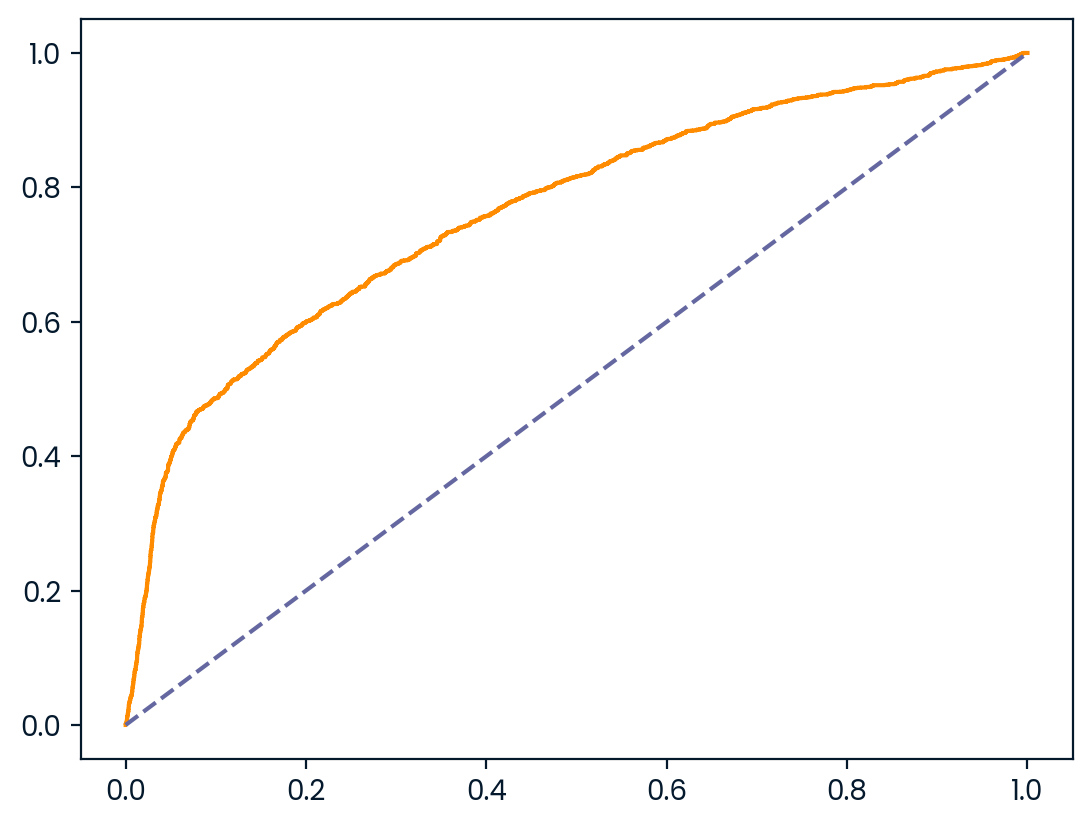

0.7643248801355148


In [36]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)
print(auc)

## Model discrimination and impact

### Thresholds and Confusion Matrices
Setting different thresholds for defaults can significantly impact the overall performance of the model. To evaluate this, confusion matrices are used.

Recall the structure of a confusion matrix:

![conf_mat](https://raw.githubusercontent.com/sunpcy/Prachya-github/main/Project_credit_risk/images/conf_mat.png)

By setting different values for the threshold on the probability of default, and using a confusion matrix, you can observe how these changes affect the model's performance.

The data frame of predictions, `preds_df`, as well as the model `clf_logistic`, have been preloaded into the workspace for this analysis.

In [38]:
from sklearn.metrics import confusion_matrix

In [41]:
# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test, preds_df['loan_status']))

print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1])

[[9023  175]
 [2152  434]]
0.16782675947409126


In [42]:
# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test, preds_df['loan_status']))

print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1])

[[8476  722]
 [1386 1200]]
0.46403712296983757


### How Thresholds Affect Performance
Setting the threshold to 0.4 has shown promising results for model evaluation. Now, assess the financial impact using the default recall, which is selected from the classification report using the `precision_recall_fscore_support()` function.

To estimate the amount of unexpected loss, use the default recall to determine the proportion of defaults that were not detected with the new threshold. This will provide a dollar amount representing the potential losses if all the undetected defaults were to default simultaneously.

The average loan value, `avg_loan_amnt` has been calculated and made available in the workspace, along with `preds_df` and `y_test`.

In [45]:
clf_logistic_preds = clf_logistic.predict_proba(X_test)
preds_df = pd.DataFrame(clf_logistic_preds[:,1], columns = ['prob_default'])
avg_loan_amnt = np.mean(cr_loan_prep['loan_amnt'])

In [69]:
# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

9872265.223119883


### Threshold Selection
There is a trade-off between metrics such as default recall, non-default recall, and model accuracy. An effective way to approximate a good starting threshold value is to plot all three metrics using matplotlib. This graph visualizes how each metric changes with different threshold values and helps identify a point where the performance of all three metrics is satisfactory for the credit data.

The threshold values `thresh`, default recall values `def_recalls`, non-default recall values `nondef_recalls`, and accuracy scores `accs` have been preloaded into the workspace. To make the plot easier to read, the array `ticks` for x-axis tick marks has also been loaded.

In [65]:
from sklearn.metrics import accuracy_score

In [53]:
# Plain Value

def_recalls = [0.7981438515081206, 0.7583139984532096, 0.7157772621809745, 0.6759474091260634, 0.6349574632637278, 0.594354215003867, 0.5467904098994586, 0.5054137664346481, 0.46403712296983757, 0.39984532095901004, 0.32211910286156226, 0.2354988399071926, 0.16782675947409126, 0.1148491879350348, 0.07733952049497293, 0.05529775715390565, 0.03750966744006187, 0.026295436968290797, 0.017788089713843776]

nondef_recalls = [0.5342465753424658, 0.5973037616873234, 0.6552511415525114, 0.708306153511633, 0.756468797564688, 0.8052837573385518, 0.8482278756251359, 0.8864970645792564, 0.9215046749293324, 0.9492280930637095, 0.9646662317895195, 0.9733637747336378, 0.9809741248097412, 0.9857577734290063, 0.9902152641878669, 0.992280930637095, 0.9948901935203305, 0.9966297021091541, 0.997499456403566]

accs = [0.5921588594704684, 0.6326374745417516, 0.6685336048879837, 0.7012050237610319, 0.7298031228784793, 0.7589952477936185, 0.7820773930753564, 0.8028682959945689, 0.8211133740665308, 0.8286659877800407, 0.8236591989137814, 0.811439239646979, 0.8025288526816021, 0.7946367956551256, 0.7898845892735913, 0.7866598778004074, 0.7847929395790902, 0.7836897488119484, 0.7825016972165648]

ticks = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

thresh = [0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65]

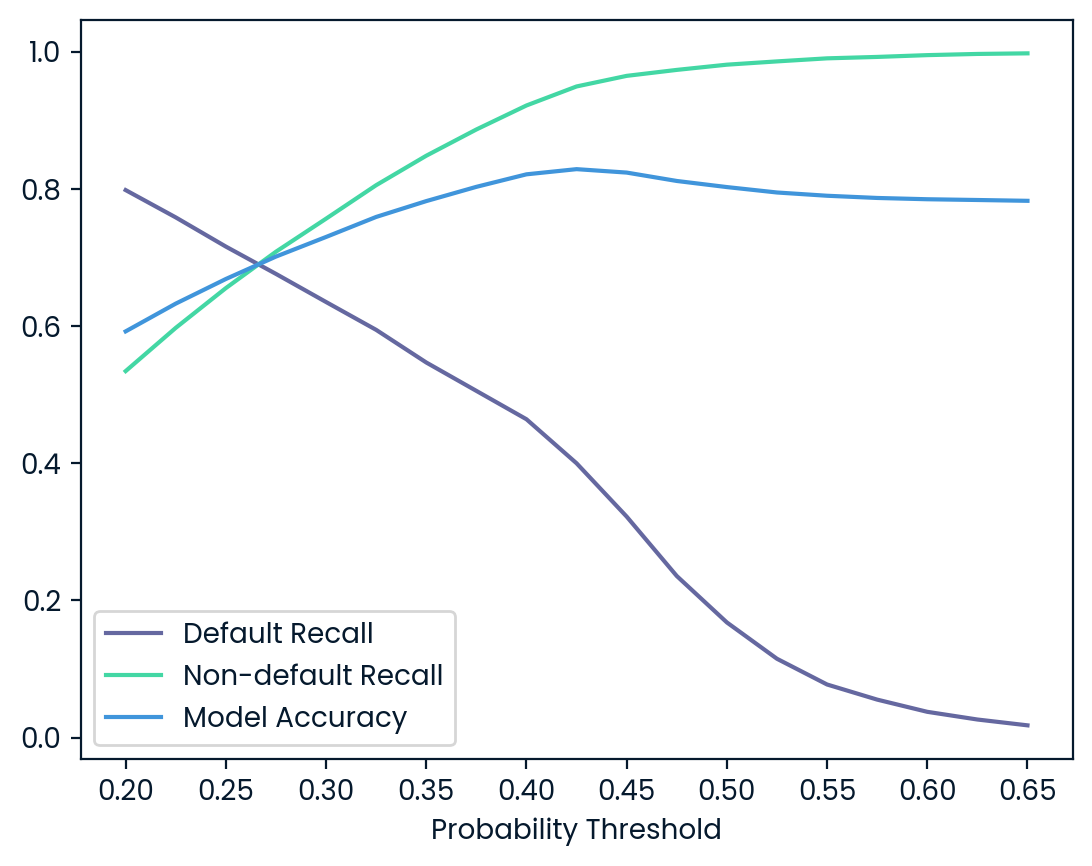

In [54]:
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

# This threshold would make a great starting point, but declaring all loans about 0.275 to be a default is probably not practical.

### Rebuild code above for my own if is not plain value.

In [67]:
# Build Function
default_recalls = []
non_default_recalls = []
accuracies = []

# Thresholds
thresh = [0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65]

# Loop through each threshold
for t in thresh:
    # Apply threshold
    preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > t else 0)
    
    # Calculate metrics
    precision, recall, f1, support = precision_recall_fscore_support(y_test, preds_df['loan_status'])
    accuracy = accuracy_score(y_test, preds_df['loan_status'])
    
    # Append results to lists
    default_recalls.append(recall[1])
    non_default_recalls.append(recall[0])
    accuracies.append(accuracy)

Default Recalls:  [0.7981438515081206, 0.7583139984532096, 0.7157772621809745, 0.6759474091260634, 0.6349574632637278, 0.594354215003867, 0.5467904098994586, 0.5054137664346481, 0.46403712296983757, 0.39984532095901004, 0.32211910286156226, 0.2354988399071926, 0.16782675947409126, 0.1148491879350348, 0.07733952049497293, 0.05529775715390565, 0.03750966744006187, 0.026295436968290797, 0.017788089713843776]
Non-Default Recalls:  [0.5342465753424658, 0.5973037616873234, 0.6552511415525114, 0.708306153511633, 0.756468797564688, 0.8052837573385518, 0.8482278756251359, 0.8864970645792564, 0.9215046749293324, 0.9492280930637095, 0.9646662317895195, 0.9733637747336378, 0.9809741248097412, 0.9857577734290063, 0.9902152641878669, 0.992280930637095, 0.9948901935203305, 0.9966297021091541, 0.997499456403566]
Accuracies:  [0.5921588594704684, 0.6326374745417516, 0.6685336048879837, 0.7012050237610319, 0.7298031228784793, 0.7589952477936185, 0.7820773930753564, 0.8028682959945689, 0.8211133740665308

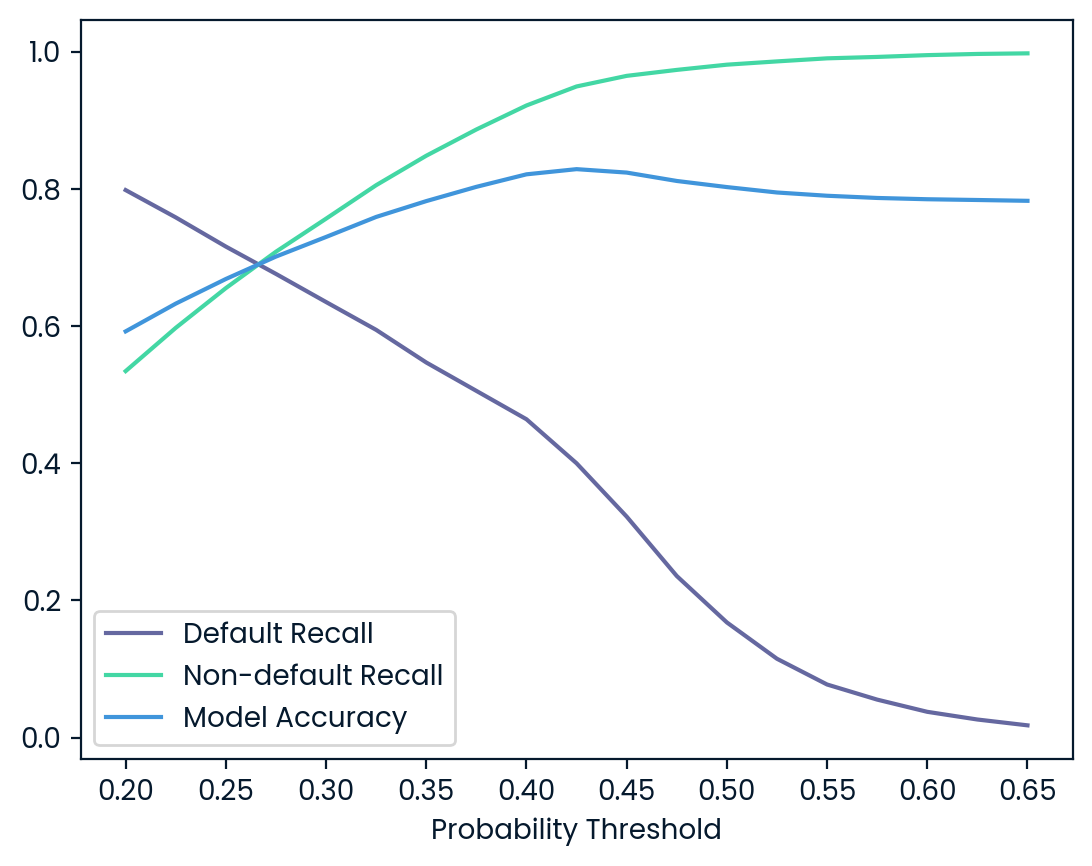

In [70]:
# Plot Graph
plt.plot(thresh,default_recalls)
plt.plot(thresh,non_default_recalls)
plt.plot(thresh,accuracies)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

# Gradient Boosted Trees Using XGBoost

## Gradient boosted trees with XGBoost

In [2]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split

cr_loan_prep = pd.read_csv("https://assets.datacamp.com/production/repositories/4876/datasets/2f6c17f10d5156a29670d1926fdf7125c002e038/cr_loan_w2.csv")
X, y = cr_loan_prep.drop('loan_status', axis = 1), cr_loan_prep[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

### Trees for defaults
This section involves training a gradient boosted tree model on the credit data and examining a sample of the predictions. The initial predictions from the logistic regression model were not very accurate. The goal is to determine whether this model will perform better.

The credit dataset `cr_loan_prep`, the training sets `X_train` and `y_train`, and the test data `X_test` are available in the workspace. The XGBoost package is imported as `xgb`.

In [3]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.990942
1            1      0.983987
2            0      0.000807
3            0      0.001239
4            1      0.084892


### Gradient Boosted Portfolio Performance

This section involves analyzing the overall effect on portfolio performance when predicting the probability of default using both a `LogisticRegression()` and `XGBClassifier()`. Various scoring methods have been applied and samples of the predictions have been reviewed. The next step is to use expected loss as a scenario to illustrate the importance of testing different models.

A DataFrame called `portfolio` has been created to combine the probabilities of default for both models, the loss given default (assumed to be 20% for now), and the `loan_amnt`, which is considered the exposure at default.

![formula](https://raw.githubusercontent.com/sunpcy/Prachya-github/main/Project_credit_risk/images/formula.png)

The data frame `cr_loan_prep` along with the `X_train` and `y_train` training sets have been loaded into the workspace.

In [18]:
from sklearn.linear_model import LogisticRegression

clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))
gbt_preds = pd.DataFrame(clf_gbt.predict_proba(X_test)[:,1][:], columns = ['gbt_prob_default'])
lr_preds = pd.DataFrame(clf_logistic.predict_proba(X_test)[:,1][:], columns = ['lr_prob_default'])
lgd = pd.DataFrame(np.full((len(y_test)), 0.20), columns = ['lgd'])
portfolio = pd.concat([gbt_preds, lr_preds, lgd,X_test[['loan_amnt']].reset_index(drop = True)], axis = 1)

In [19]:
# Print the first five rows of the portfolio data frame
print(portfolio.head())

   gbt_prob_default  lr_prob_default  lgd  loan_amnt
0          0.990942         0.445779  0.2      15000
1          0.983987         0.223447  0.2      11200
2          0.000807         0.288558  0.2      15000
3          0.001239         0.169358  0.2      10800
4          0.084892         0.114182  0.2       3000


In [20]:
# Create expected loss columns for each model using the formula
portfolio['gbt_expected_loss'] = portfolio['gbt_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']
portfolio['lr_expected_loss'] = portfolio['lr_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']

# Print the sum of the expected loss for lr
print('LR expected loss: ', np.sum(portfolio['lr_expected_loss']))

# Print the sum of the expected loss for gbt
print('GBT expected loss: ', np.sum(portfolio['gbt_expected_loss']))

LR expected loss:  5596776.979852879
GBT expected loss:  5383982.809227714


### Assessing Gradient Boosted Trees

This section involves using `XGBClassifier()` models to predict the probability of default. These models can also utilize the `.predict()` method to generate predictions for the actual class of `loan_status`.

Initial model performance should be evaluated using the metrics from the `classification_report()`. Note that thresholds for these models have not been set yet.

The data sets `cr_loan_prep`, `X_test`, and `y_test` have already been loaded into the workspace. The model `clf_gbt` has also been loaded. The `classification_report()` for the logistic regression will print automatically.


In [22]:
from sklearn.metrics import classification_report

# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

[1 1 0 ... 0 0 0]
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.74      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784



## Column selection for credit risk

### Column Importance and Default Prediction

When using multiple training sets with various groups of columns, it's crucial to identify which columns are significant and which are not. Maintaining a set of columns can be expensive or time-consuming, especially if they do not impact `loan_status`.

The `X` data for this exercise was created with the following code:

```python
X = cr_loan_prep[['person_income','loan_int_rate',
                  'loan_percent_income','loan_amnt',
                  'person_home_ownership_MORTGAGE','loan_grade_F']]
```

Train an `XGBClassifier()` model on this data and check the column importance to see how each one contributes to predicting loan_status.

The `cr_loan_prep` dataset along with `X_train` and `y_train` have been loaded into the workspace.

In [26]:
X = cr_loan_prep[['person_income','loan_int_rate',
                  'loan_percent_income','loan_amnt',
                  'person_home_ownership_MORTGAGE','loan_grade_F']]
y = cr_loan_prep[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [27]:
# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'person_income': 1299.0, 'loan_int_rate': 1001.0, 'loan_percent_income': 515.0, 'loan_amnt': 519.0, 'person_home_ownership_MORTGAGE': 116.0, 'loan_grade_F': 9.0}


### Visualizing Column Importance

Training the model on different sets of columns can affect performance. However, it’s important to determine whether the importance of the same column changes depending on the group it is included in.

The datasets `X2` and `X3` have been created with the following code:

```python
X2 = cr_loan_prep[['loan_int_rate','person_emp_length']]
X3 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income']]
```
Understanding how different columns contribute to predicting loan_status is crucial for model interpretability.

The datasets `cr_loan_prep`, `X2_train`, `X2_test`, `X3_train`, `X3_test`, `y_train`, and `y_test` have been loaded into the workspace.

In [34]:
X2 = cr_loan_prep[['loan_int_rate','person_emp_length']]
X3 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income']]
y = cr_loan_prep[['loan_status']]
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=.4, random_state=123)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=.4, random_state=123)

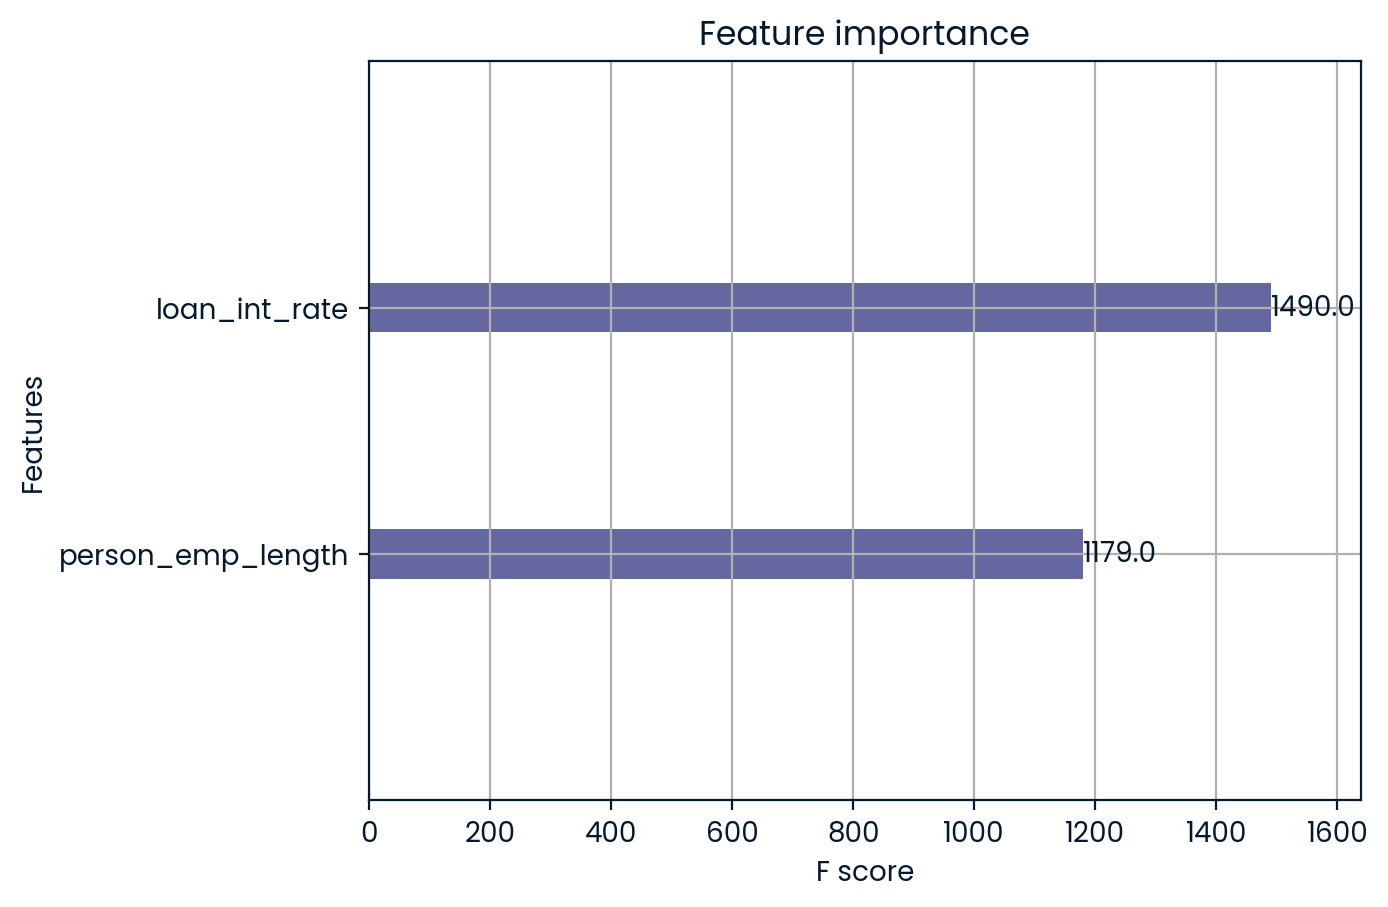

In [36]:
import matplotlib.pyplot as plt

# Train a model on the X data with 2 columns
clf_gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()

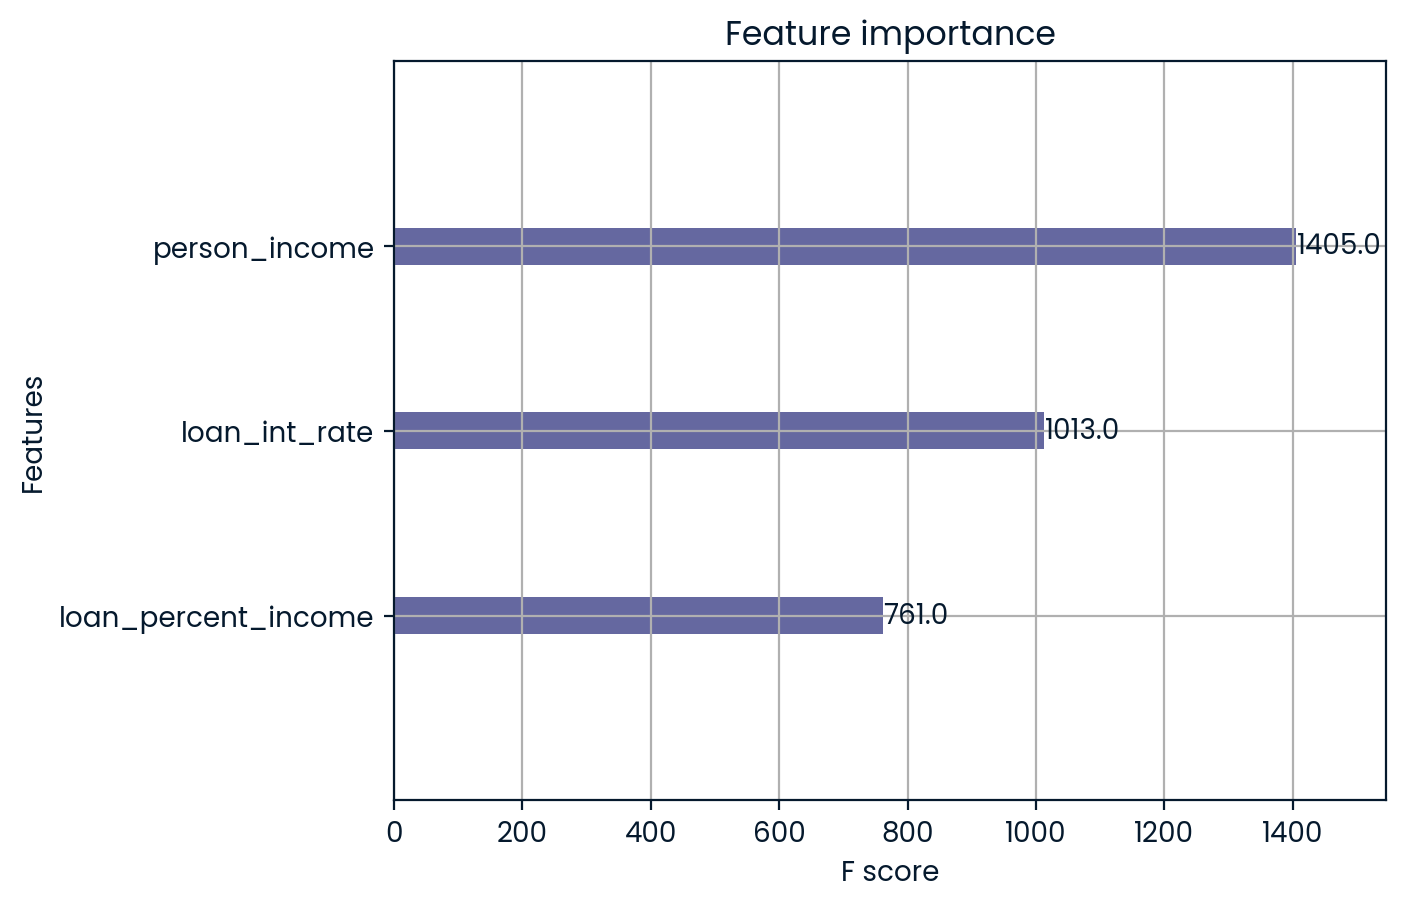

In [37]:
# Train a model on the X data with 3 columns
clf_gbt3 = xgb.XGBClassifier().fit(X3_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()

### Column Selection and Model Performance

The training set created from different column combinations impacts both the model's performance and the importance values of the columns. It is important to determine if varying the selection of columns affects the F-1 scores, which combine precision and recall, of the model. 

To address this, train two different models on two distinct sets of columns and compare their performance.

Inaccurate predictions of defaults as non-defaults can lead to unexpected losses, especially if the probability of default for these loans is very low. Evaluating the F-1 score for defaults will help assess how well the models predict defaults.

The credit data `cr_loan_prep` and the two training column sets `X` and `X2` have been loaded into the workspace. The models `gbt` and `gbt2` have already been trained.

In [40]:
X = cr_loan_prep[['person_income', 'loan_int_rate', 'loan_percent_income', 'loan_amnt', 'person_home_ownership_MORTGAGE']]
X2 = cr_loan_prep[['person_income', 'loan_int_rate', 'loan_percent_income', 'person_emp_length', 'person_home_ownership_RENT']]
y = cr_loan_prep[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=.4, random_state=123)
gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))
gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))

In [41]:
# Predict the loan_status using each model
gbt_preds = gbt.predict(X_test)
gbt2_preds = gbt2.predict(X2_test)

# Print the classification report of the first model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

# Print the classification report of the second model
print(classification_report(y_test, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.91      0.95      0.93      9198
     Default       0.79      0.66      0.72      2586

    accuracy                           0.89     11784
   macro avg       0.85      0.81      0.83     11784
weighted avg       0.88      0.89      0.88     11784

              precision    recall  f1-score   support

 Non-Default       0.91      0.97      0.94      9198
     Default       0.88      0.66      0.75      2586

    accuracy                           0.90     11784
   macro avg       0.89      0.82      0.85     11784
weighted avg       0.90      0.90      0.90     11784



## Cross validation for credit models

### Cross-Validating Credit Models

Credit loan data and its characteristics can change over time, and it may not always match the data in the current test sets. To address this, cross-validation can be used to evaluate model performance on several smaller training and test sets derived from the original `X_train` and `y_train`.

Use the XGBoost function `cv()` to perform cross-validation, ensuring that all parameters for `cv()` are set up appropriately for the test data.

The datasets `X_train` and `y_train` are available in the workspace, along with the trained model `gbt` and the parameter dictionary `params`.

In [2]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split

cr_loan_prep = pd.read_csv("https://assets.datacamp.com/production/repositories/4876/datasets/2f6c17f10d5156a29670d1926fdf7125c002e038/cr_loan_w2.csv")
params = {'objective': 'binary:logistic', 'seed': 123, 'eval_metric': 'auc'}
X, y = cr_loan_prep.drop('loan_status', axis = 1), cr_loan_prep[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)
gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

In [3]:
# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.898182       0.001318       0.892520      0.004650
1        0.909256       0.002052       0.902780      0.005053
2        0.913621       0.002205       0.906834      0.004423
3        0.918600       0.001092       0.910779      0.005221
4        0.922251       0.001818       0.914193      0.004422


### Limits to Cross-Validation Testing

To conduct extensive cross-validation, large values for both `nfold` and `num_boost_round` can be specified. The DataFrame `cv_results_big` has been prepared with the following code:

```python
cv = xgb.cv(params, DTrain, num_boost_round=600, nfold=10, shuffle=True)
cv = xgb.cv(params, DTrain, num_boost_round = 600, nfold=10,
            shuffle = True)
```            

This approach performed 600 iterations of cross-validation, with the shuffle parameter ensuring that records are shuffled each time.

The `cv_results_big` DataFrame provides insights into the AUC values. Review these values to determine if they approach 1.0 through cross-validation. Additionally, plotting the test AUC scores will reveal their progression.

In [4]:
cv_results_big = pd.read_csv("https://assets.datacamp.com/production/repositories/4876/datasets/62be1fa5c8f2c03041e138eea2de523b3b0639c3/cv_results.csv")
cv_results_big = cv_results_big.drop('Unnamed: 0', axis=1)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.897568       0.000909       0.892900      0.008258
1        0.906985       0.002611       0.901162      0.007519
2        0.913678       0.001403       0.907910      0.007753
3        0.919123       0.000921       0.912130      0.007145
4        0.922864       0.001097       0.914962      0.006706
0.94


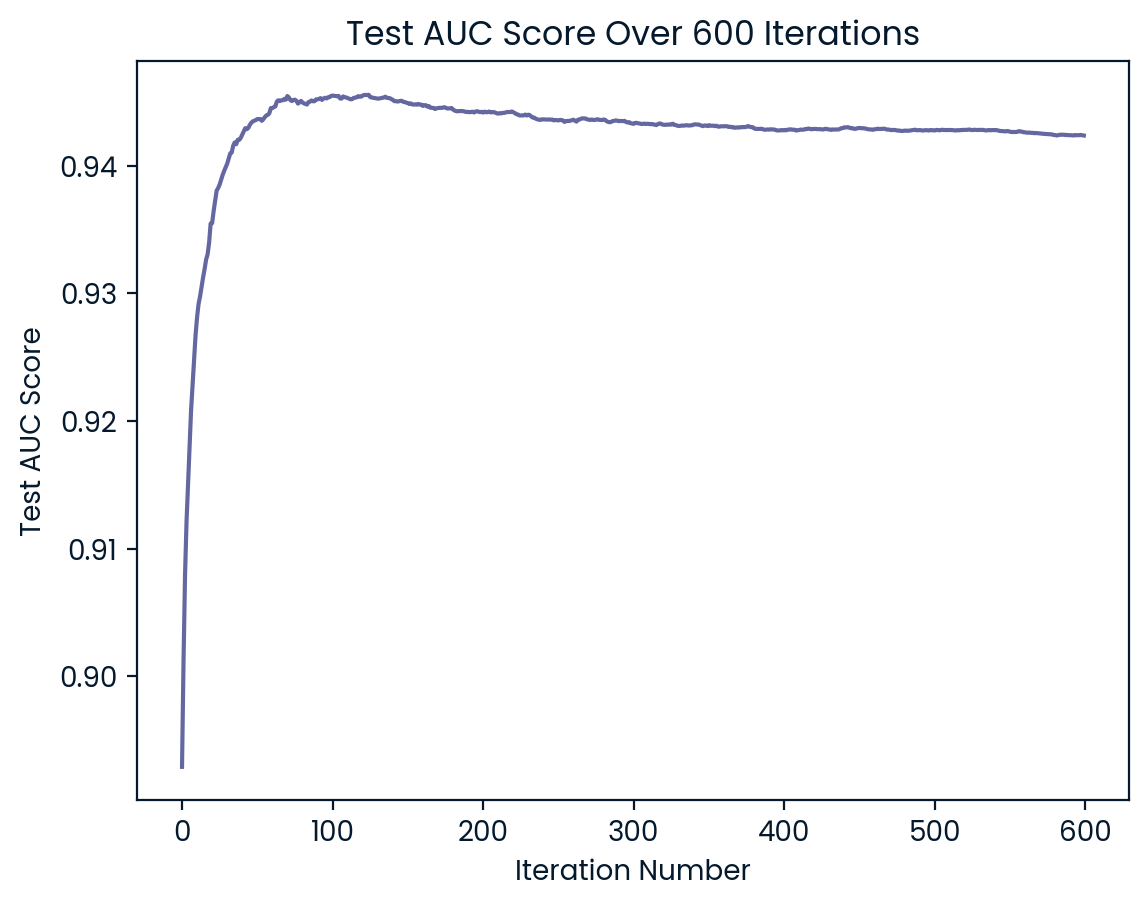

In [6]:
import matplotlib.pyplot as plt

# Print the first five rows of the CV results data frame
print(cv_results_big.head())

# Calculate the mean of the test AUC scores
print(np.mean(cv_results_big['test-auc-mean']).round(2))

# Plot the test AUC scores for each iteration
plt.plot(cv_results_big['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

### Cross-Validation Scoring

To evaluate overall performance, use `cross_val_score()` for cross-validation scoring.

This task provides an opportunity to experiment with hyperparameters such as `learning_rate` and `max_depth`. Hyperparameters function as settings that can help optimize model performance.

The datasets `cr_loan_prep`, `X_train`, and `y_train` are available in the workspace.

In [8]:
from sklearn.model_selection import cross_val_score

# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.94048427 0.93256393 0.93324282 0.92462653]
Average accuracy: 0.93 (+/- 0.01)


## Class imbalance in loan data

### Undersampling Training Data

Undersample the training set using Pandas to address class imbalance. After completing the undersampling process, verify the results by checking the value counts for `loan_status`.

The variables `X_y_train`, `count_nondefault`, and `count_default` are available in the workspace and were created using the following code:

```python
X_y_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()
```
The `.value_counts()` for the original training data will be displayed automatically.

In [9]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

In [10]:
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

0    3877
1    3877
Name: loan_status, dtype: int64


### Undersampled Tree Performance

After undersampling the training set and training a model on this adjusted data, the next step is to evaluate the performance of the model's predictions. This evaluation is crucial not only for assessing the probability of default on the test set but also for scoring new loan applications as they are received. High recall for defaults is particularly important, as misclassifying a default as a non-default can be costly.

Compare the performance of the new model with the original model. The original model's predictions are stored in `gbt_preds`, while the new model's predictions are stored in `gbt2_preds`.

The model predictions `gbt_preds` and `gbt2_preds`, along with `y_test`, are available in the workspace for this comparison.

In [12]:
from sklearn.metrics import classification_report

In [54]:
# gbt
cr_loan_prep = pd.read_csv("https://assets.datacamp.com/production/repositories/4876/datasets/2f6c17f10d5156a29670d1926fdf7125c002e038/cr_loan_w2.csv")
X, y = cr_loan_prep.drop('loan_status', axis = 1), cr_loan_prep[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)
gbt = xgb.XGBClassifier(learning_rate = 0.2, max_depth = 7).fit(X_train,np.ravel(y_train))
gbt_preds = gbt.predict(X_test)

# gbt2
X_y_train = pd.concat([X_train.reset_index(drop = True), y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]
nondefaults_under = nondefaults.sample(count_default)
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True), defaults.reset_index(drop = True)], axis = 0)
X_train_under = X_y_train_under.drop(columns=['loan_status'])
y_train_under = X_y_train_under['loan_status']
gbt2 = xgb.XGBClassifier(learning_rate = 0.2, max_depth = 7).fit(X_train_under, y_train_under)
gbt2_preds = gbt2.predict(X_test)

In [31]:
# Check the classification reports
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))
print(classification_report(y_test, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.95      0.73      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784

              precision    recall  f1-score   support

 Non-Default       0.95      0.91      0.93      9198
     Default       0.72      0.83      0.77      2586

    accuracy                           0.89     11784
   macro avg       0.83      0.87      0.85     11784
weighted avg       0.90      0.89      0.89     11784



In [33]:
from sklearn.metrics import confusion_matrix

In [57]:
# Print the confusion matrix for both old and new models
print(confusion_matrix(y_test,gbt_preds))
print(confusion_matrix(y_test,gbt2_preds))

[[9105   93]
 [ 691 1895]]
[[8412  786]
 [ 466 2120]]


In [55]:
from sklearn.metrics import roc_auc_score

In [56]:
# Print and compare the AUC scores of the old and new models
print(roc_auc_score(y_test, gbt_preds))
print(roc_auc_score(y_test, gbt2_preds))

0.8613405315086655
0.8671727789103756


# Model Evaluation and Implementation

## Model evaluation and implementation

### Comparing Model Reports

Logistic regression models and gradient boosted trees have been utilized. The next step is to compare these models to determine which will be used for final predictions.

A key initial step in comparing the models' ability to predict the probability of default is to examine their metrics using the `classification_report()`. This report provides a comprehensive view of various scoring metrics for each model. Given that the data and models typically exhibit class imbalance with few defaults, focus on the metrics for defaults.

The trained models `clf_logistic` and `clf_gbt` are available, along with their predictions in `preds_df_lr` and `preds_df_gbt`, respectively. A cutoff of 0.4 was applied to each model. The test set `y_test` is also available for evaluation.


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
import xgboost as xgb

In [3]:
cr_loan_prep = pd.read_csv("https://assets.datacamp.com/production/repositories/4876/datasets/2f6c17f10d5156a29670d1926fdf7125c002e038/cr_loan_w2.csv")
X = cr_loan_prep.drop('loan_status', axis = 1)
y = cr_loan_prep[['loan_status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# LogisticRegression
clf_logistic = LogisticRegression(solver='lbfgs', max_iter = 15, C = 1.0).fit(X_train, np.ravel(y_train))
clf_logistic_preds = clf_logistic.predict_proba(X_test)[:, 1]
preds_df_lr = pd.DataFrame(clf_logistic_preds, columns = ['prob_default'])
preds_df_lr['loan_status'] = preds_df_lr['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Gradient Boosted Trees (XGBoost)
clf_gbt = xgb.XGBClassifier(learning_rate=0.1, max_depth=7, min_split_loss=1.0, reg_lambda=1.2).fit(X_train, np.ravel(y_train))
clf_gbt_preds = pd.DataFrame(clf_gbt.predict_proba(X_test)[:, 1], columns = ['prob_default'])
preds_df_gbt = pd.DataFrame(clf_gbt_preds, columns = ['prob_default'])
preds_df_gbt['loan_status'] = preds_df_gbt['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

In [4]:
# Print the logistic regression classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_lr['loan_status'], target_names=target_names))

# Print the gradient boosted tree classification report
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=target_names))

# Print the default F-1 scores for the logistic regression
print(precision_recall_fscore_support(y_test, preds_df_lr['loan_status'], average = 'macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test, preds_df_gbt['loan_status'], average = 'macro')[2])

              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      9198
     Default       0.62      0.46      0.53      2586

    accuracy                           0.82     11784
   macro avg       0.74      0.69      0.71     11784
weighted avg       0.81      0.82      0.81     11784

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.73      0.82      2586

    accuracy                           0.93     11784
   macro avg       0.93      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784

0.7108943782814463
0.8909014142736051


### Comparing with ROC Curves

To compare the two models, utilize ROC curves and AUC scores. Visual representations can be instrumental in understanding the differences between models and effectively communicating these differences to stakeholders.

The ROC curve provides insight into the model's performance across different thresholds, while the AUC score measures the area under the ROC curve. A higher AUC indicates better model performance. The lift, represented by the distance of the ROC curve from the random prediction line, also helps in evaluating model effectiveness. The model exhibiting greater lift and a higher AUC is generally better at making accurate predictions.

The trained models `clf_logistic` and `clf_gbt` are available, along with their respective probability predictions `clf_logistic_preds` and `clf_gbt_preds`.


In [5]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

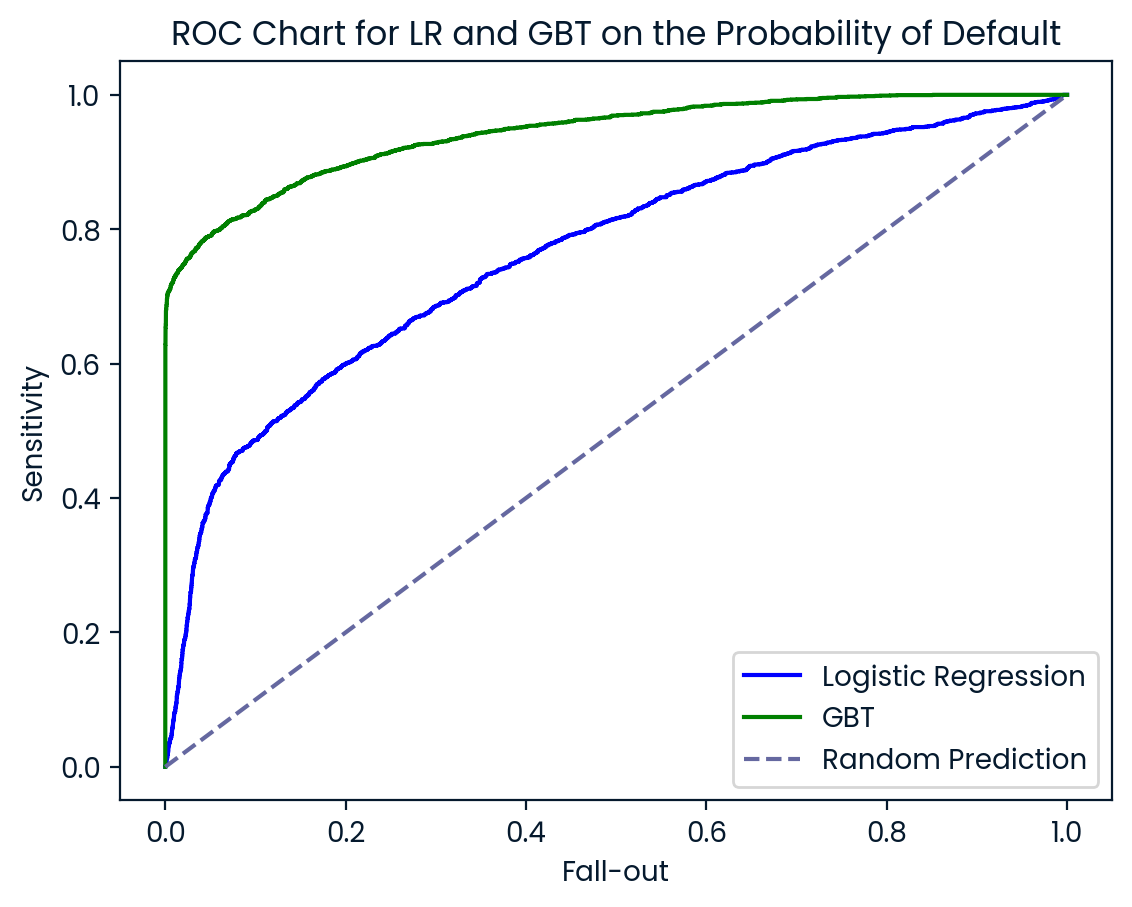

In [6]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, clf_logistic_preds)
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, clf_gbt_preds)

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import roc_auc_score

In [8]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, clf_logistic_preds))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, clf_gbt_preds))

Logistic Regression AUC Score: 0.76
Gradient Boosted Tree AUC Score: 0.94


### Calibration Curves

The gradient boosted tree model `clf_gbt` has demonstrated the best overall performance. To further assess model reliability, it is essential to check the calibration of both models to evaluate how stable the default prediction performance is across different probability thresholds. Calibration curves, generated using the `calibration_curve()` function, are useful for this analysis.

Due to the complexity of creating calibration curves, the process involves several steps. The goal is to systematically add and analyze each component.

The prediction sets `clf_logistic_preds` and `clf_gbt_preds` are available, along with the calibration curve outputs for each model, stored as `frac_of_pos_lr`, `mean_pred_val_lr`, `frac_of_pos_gbt`, and `mean_pred_val_gbt`.


In [9]:
from sklearn.calibration import calibration_curve

# Calculate calibration curve for logistic regression model
frac_of_pos_lr, mean_pred_val_lr = calibration_curve(y_test, clf_logistic_preds, n_bins=16)

# Calculate calibration curve for gradient boosted tree model
frac_of_pos_gbt, mean_pred_val_gbt = calibration_curve(y_test, clf_gbt_preds, n_bins=16)

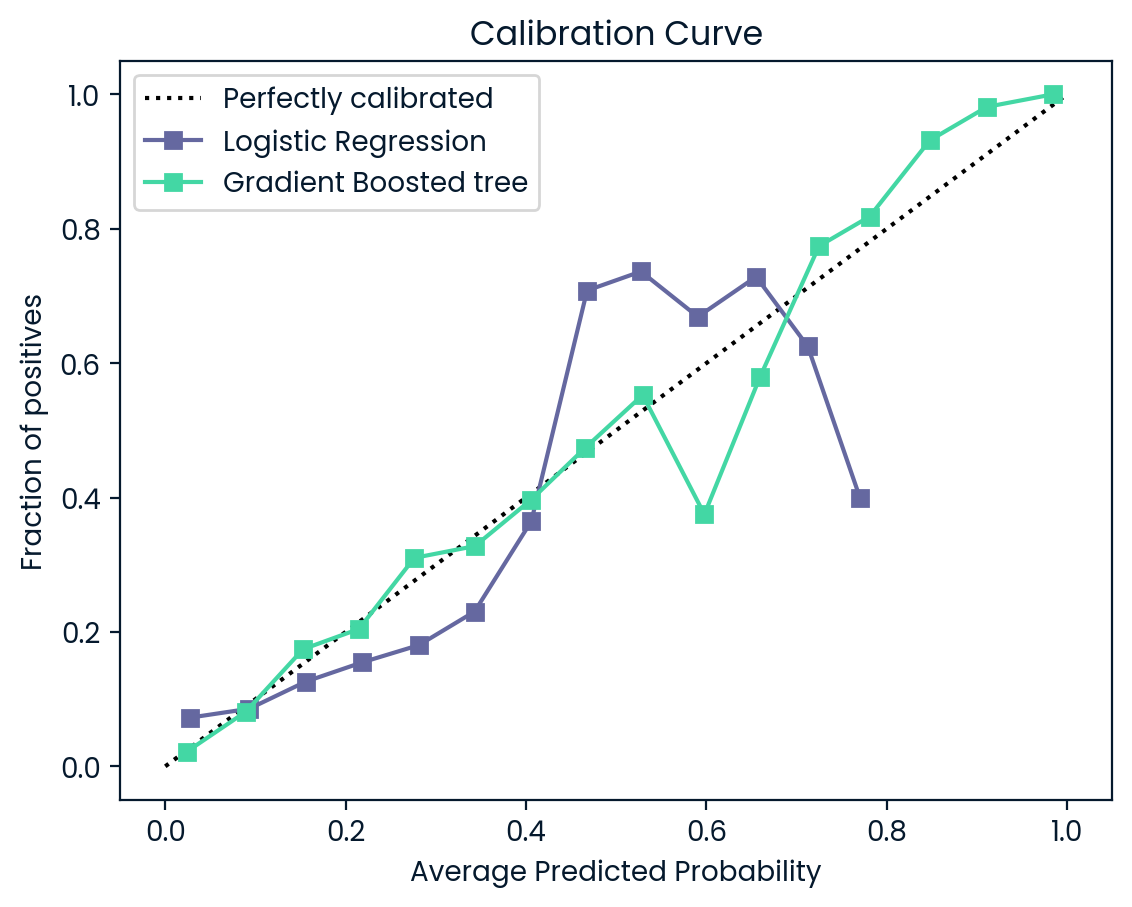

In [10]:
# Create the calibration curve plot with the guideline
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')

# Add the calibration curve for the logistic regression to the plot
plt.plot(mean_pred_val_lr, frac_of_pos_lr, 's-', label='%s' % 'Logistic Regression')

# Add the calibration curve for the gradient boosted tree
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt, 's-', label='%s' % 'Gradient Boosted tree')

plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

## Credit acceptance rates

### Acceptance Rates

Setting an acceptance rate and calculating the corresponding threshold can help determine the percentage of new loans to accept. For this analysis, assume that the test data represents a fresh batch of new loans. Use the `quantile()` function from NumPy to calculate the threshold.

Apply this threshold to assign new `loan_status` values and assess whether the number of defaults and non-defaults in the data changes as a result.

The trained model `clf_gbt` and the DataFrame containing its predictions, `test_pred_df`, are available for this analysis.


In [11]:
preds_list = clf_gbt_preds['prob_default'].tolist()
true_list = y_test['loan_status'].tolist()
lists = [true_list, preds_list]
test_pred_df = pd.concat([pd.Series(x) for x in lists], axis=1)
test_pred_df.columns = ['true_loan_status','prob_default']

In [12]:
# Check the statistics of the probabilities of default
print(test_pred_df['prob_default'].describe())

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(test_pred_df['prob_default'], 0.85)

# Apply acceptance rate threshold
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(test_pred_df['pred_loan_status'].value_counts())

count    11784.000000
mean         0.216866
std          0.333038
min          0.000354
25%          0.022246
50%          0.065633
75%          0.177804
max          0.999557
Name: prob_default, dtype: float64
0    10016
1     1768
Name: pred_loan_status, dtype: int64


### Visualizing Quantiles of Acceptance

To understand the threshold calculated using `quantile()`, and to visualize how it divides the loans into accepted and rejected, create a histogram of the predicted probabilities from the test set. Adding a reference line for the threshold on this histogram will visually represent its position within the probability distribution.

The model predictions `clf_gbt_preds` have been loaded and are available for this visualization.


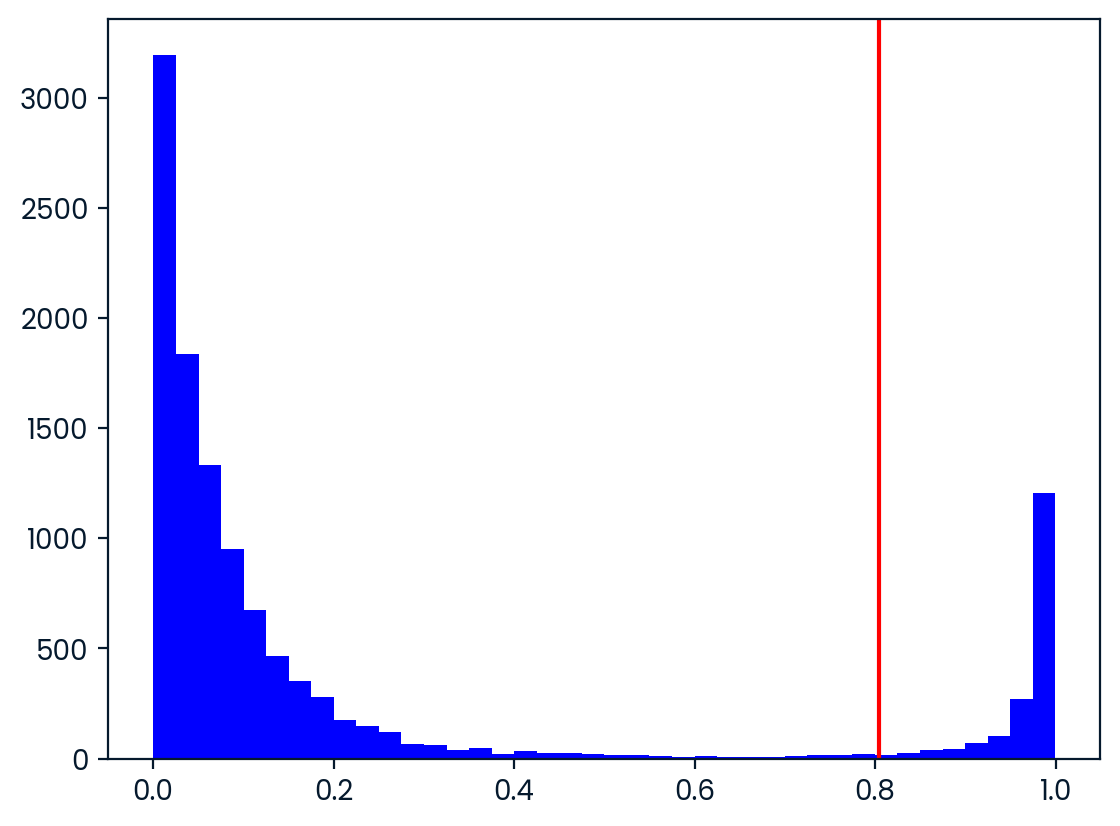

In [72]:
# Plot the predicted probabilities of default
plt.hist(clf_gbt_preds, color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(clf_gbt_preds, 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold, color = 'red')
plt.show()

### Bad Rates

With the acceptance rate established, analyze the bad rate within the accepted loans to determine the percentage of defaults among the loans that were accepted.

Consider the implications of the acceptance rate and bad rate. The acceptance rate is set to reduce the number of defaults in the portfolio, as defaults are more costly. Evaluate whether the bad rate among accepted loans is lower than the percentage of defaults in the test data.

The predictions DataFrame `test_pred_df` is available for this analysis.


In [74]:
# Print the top 5 rows of the new data frame
print(test_pred_df.head())

# Create a subset of only accepted loans
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

# Calculate the bad rate
print(np.sum(accepted_loans['true_loan_status']) / accepted_loans['true_loan_status'].count())

   true_loan_status  prob_default  pred_loan_status
0                 1      0.982387                 1
1                 1      0.975163                 1
2                 0      0.003474                 0
3                 0      0.005457                 0
4                 1      0.119876                 0
0.08256789137380191


### Acceptance Rate Impact

To understand the impact of acceptance rates on the portfolio, examine the `loan_amnt` of each loan. Use cross-tabulations to calculate values, such as the average loan amount, for the new set of loans in `X_test`. Multiply the number of loans by the average `loan_amnt` to assess the financial impact.

For better readability, format the printed values as currency, reflecting the real-world financial context of credit risk. This can be achieved using the following code:

```python
pd.options.display.float_format = '${:,.2f}'.format
```


In [119]:
preds_list = clf_gbt_preds['prob_default'].tolist()
true_list = y_test['loan_status'].tolist()
loan_amnt = X_test['loan_amnt'].tolist()
lists = [true_list, preds_list, loan_amnt]
test_pred_df = pd.concat([pd.Series(x) for x in lists], axis=1)
test_pred_df.columns = ['true_loan_status','prob_default','loan_amnt']

threshold_15 = np.quantile(preds_df_gbt['prob_default'], 0.85)
test_pred_df['pred_loan_status_15'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_15 else 0)

In [84]:
# Print the statistics of the loan amount column
print(test_pred_df['loan_amnt'].describe())

# Store the average loan amount
avg_loan = np.mean(test_pred_df['loan_amnt'])

# Set the formatting for currency, and print the cross tab
pd.options.display.float_format = '${:,.2f}'.format
print(pd.crosstab(test_pred_df['true_loan_status'],
                 test_pred_df['pred_loan_status_15']).apply(lambda x: x * avg_loan, axis = 0))

count   $11,784.00
mean     $9,556.28
std      $6,238.01
min        $500.00
25%      $5,000.00
50%      $8,000.00
75%     $12,000.00
max     $35,000.00
Name: loan_amnt, dtype: float64
pred_loan_status_15              0              1
true_loan_status                                 
0                   $87,812,693.16     $86,006.56
1                    $7,903,046.82 $16,809,503.46


In [93]:
# Reset format
pd.reset_option('display.float_format')

## Credit strategy and minimum expected loss

### Making the Strategy Table

Before implementing a strategy, it is essential to create a strategy table that includes various acceptance rates along with their associated bad rates and threshold values. This table will help in visualizing how each part of the strategy impacts the portfolio.

While the calculations for threshold and bad rate involve several lines of code, most of the necessary code is already prepared. The strategy table can be generated using a for loop to automate the calculation of these values.

The array `accept_rates` has been populated and is available in the workspace, along with the DataFrames `preds_df_gbt` and `test_pred_df`. The arrays `thresholds` and `bad_rates` still need to be populated.


In [89]:
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
thresholds = []
bad_rates = []

In [90]:
# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(preds_df_gbt['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(preds_df_gbt['prob_default'], rate).round(3))
    # Reassign the loan_status value using the threshold
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status']) / len(accepted_loans['true_loan_status'])).round(3))

In [94]:
# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates), columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Print the entire table
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate
0              1.00      1.000     0.219
1              0.95      0.992     0.179
2              0.90      0.976     0.132
3              0.85      0.804     0.083
4              0.80      0.254     0.061
5              0.75      0.178     0.052
6              0.70      0.138     0.043
7              0.65      0.111     0.036
8              0.60      0.093     0.030
9              0.55      0.078     0.027
10             0.50      0.066     0.023
11             0.45      0.055     0.020
12             0.40      0.045     0.017
13             0.35      0.037     0.014
14             0.30      0.030     0.010
15             0.25      0.022     0.008
16             0.20      0.015     0.005
17             0.15      0.008     0.001
18             0.10      0.004     0.000
19             0.05      0.002     0.000


### Visualizing the Strategy

With the extended strategy table `strat_df` available, visuals can provide a clearer overview of the data. Although the table is manageable in size, visualizations will enhance understanding.

1. **Box Plot Analysis**: Create a box plot to examine the distribution of each column in `strat_df`. If the distribution of the `Acceptance Rate` appears similar to that of the `Bad Rate`, this may indicate a problem, suggesting that the model's calibration might be less effective than anticipated.

2. **Strategy Curve**: Plot a line graph to visualize the strategy curve. In this plot, the `Acceptance Rate` should be the independent variable, and the `Bad Rate` should be the dependent variable.

The strategy table `strat_df` has been loaded into the workspace for these visualizations.


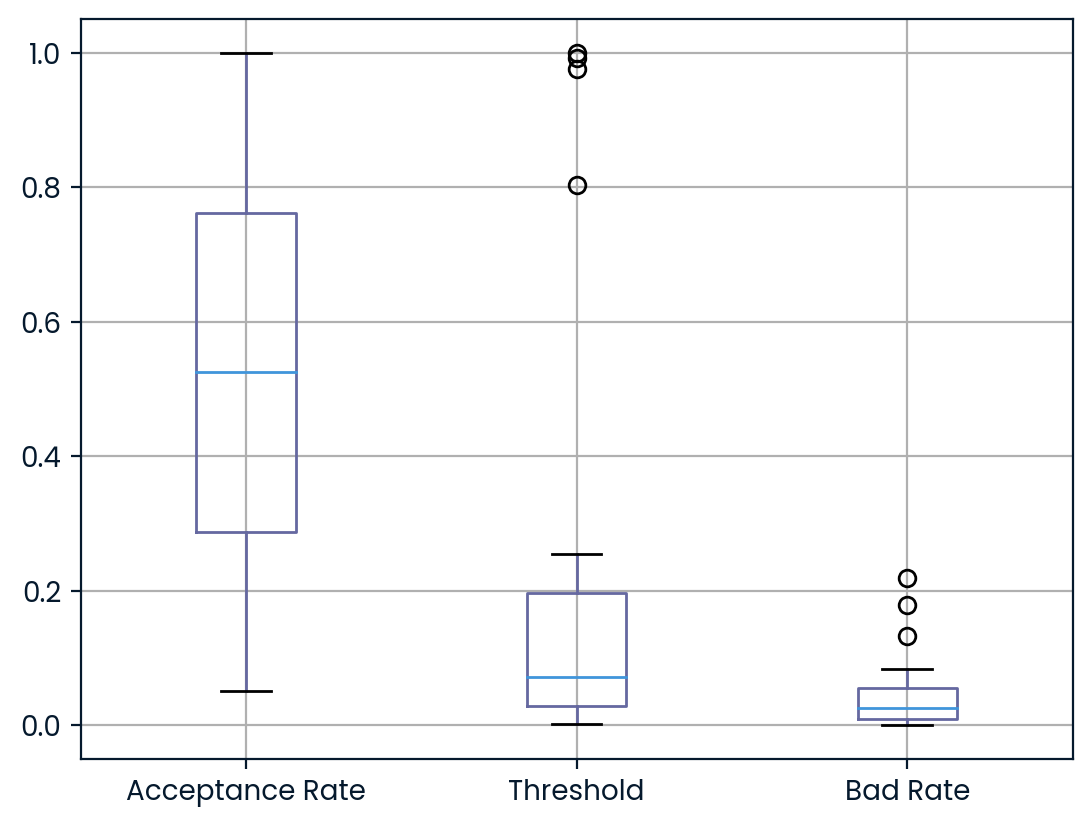

In [95]:
# Visualize the distributions in the strategy table with a boxplot
strat_df.boxplot()
plt.show()

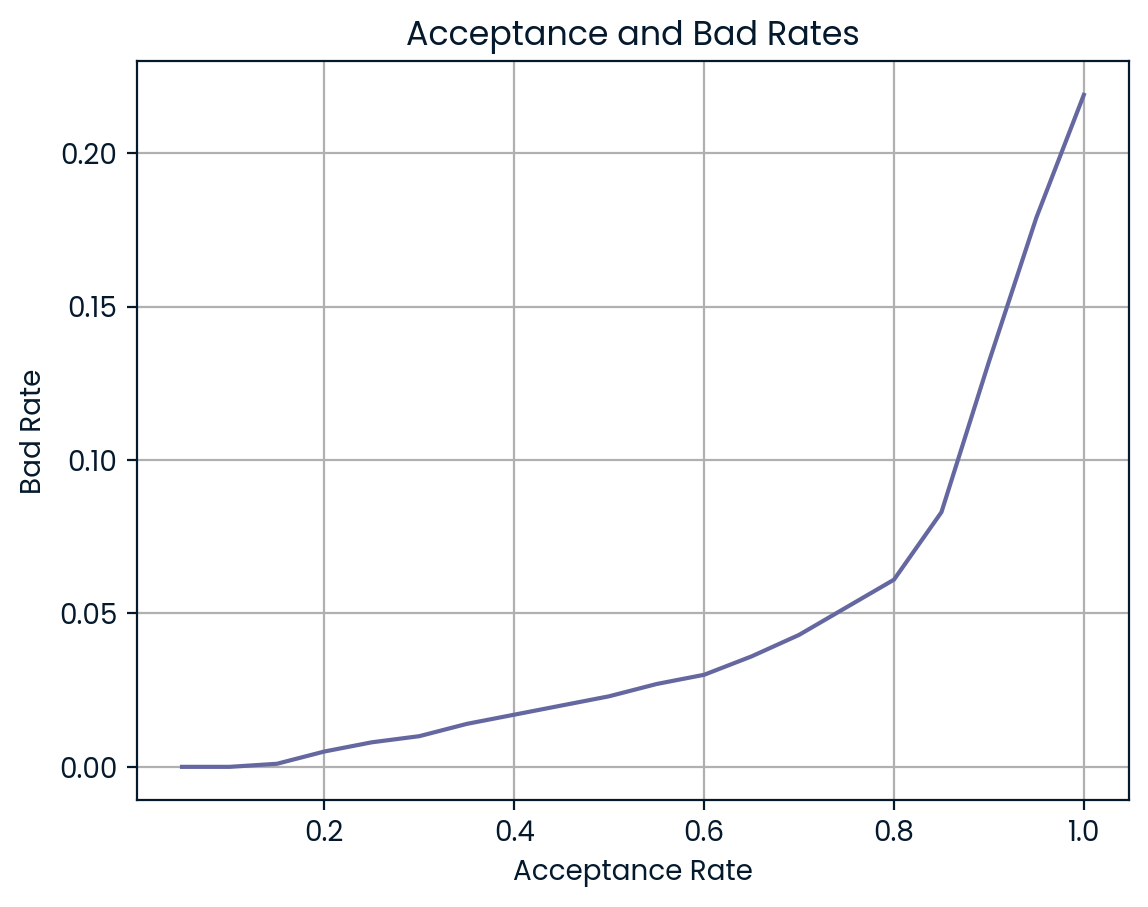

In [97]:
# Plot the strategy curve
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(True)
plt.show()

### Estimated Value Profiling

To maximize the estimated portfolio value and minimize expected loss, utilize the strategy table `strat_df`. Enhancing this table with additional columns and creating corresponding plots can provide valuable insights.

The `strat_df` DataFrame has been enhanced with the following columns:

| Column                | Description                                                      |
|-----------------------|------------------------------------------------------------------|
| `Num Accepted Loans`  | The number of loans accepted based on the threshold              |
| `Avg Loan Amnt`       | The average loan amount for the entire test set                 |
| `Estimated Value`     | The estimated net value, calculated as non-defaults minus defaults |

Use these columns to assess and visualize the potential impact of different strategies on the estimated portfolio value and expected loss.

In [98]:
# Print the contents of the strategy df
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate
0              1.00      1.000     0.219
1              0.95      0.992     0.179
2              0.90      0.976     0.132
3              0.85      0.804     0.083
4              0.80      0.254     0.061
5              0.75      0.178     0.052
6              0.70      0.138     0.043
7              0.65      0.111     0.036
8              0.60      0.093     0.030
9              0.55      0.078     0.027
10             0.50      0.066     0.023
11             0.45      0.055     0.020
12             0.40      0.045     0.017
13             0.35      0.037     0.014
14             0.30      0.030     0.010
15             0.25      0.022     0.008
16             0.20      0.015     0.005
17             0.15      0.008     0.001
18             0.10      0.004     0.000
19             0.05      0.002     0.000


In [120]:
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
thresholds = []
bad_rates = []
num_accepted_loans = []
avg_loan_amnt = []

In [136]:
# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(preds_df_gbt['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(preds_df_gbt['prob_default'], rate).round(3))
    # Reassign the loan_status value using the threshold
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status']) / len(accepted_loans['true_loan_status'])).round(3))
    # Calculate and append the number of accepted loans
    num_accepted_loans.append(len(test_pred_df[test_pred_df['prob_default'] < thresh]))
    # Calculate and append the average loan amount
    avg_loan_amnt.append(test_pred_df['loan_amnt'].mean().round(3))

In [137]:
# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates, num_accepted_loans, avg_loan_amnt), 
                        columns = ['Acceptance Rate', 'Threshold', 'Bad Rate', 'Num Accepted Loans', 'Avg Loan Amnt'])

# Calculate the Estimated Value column
strat_df['Estimated Value'] = ((strat_df['Num Accepted Loans'] * (1 - strat_df['Bad Rate'])) * strat_df['Avg Loan Amnt']) - \
                              (strat_df['Num Accepted Loans'] * strat_df['Bad Rate'] * strat_df['Avg Loan Amnt'])

In [123]:
# Display the strategy DataFrame
strat_df

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg Loan Amnt,Estimated Value
0,1.00,1.000,0.219,11784,9556.284,6.328752e+07
1,0.95,0.992,0.179,11208,9556.284,6.876259e+07
2,0.90,0.976,0.132,10597,9556.284,7.453320e+07
3,0.85,0.804,0.083,10016,9556.284,7.982693e+07
4,0.80,0.254,0.061,9425,9556.284,7.907968e+07
5,0.75,0.178,0.052,8843,9556.284,7.571757e+07
6,0.70,0.138,0.043,8248,9556.284,7.204169e+07
7,0.65,0.111,0.036,7653,9556.284,6.786858e+07
8,0.60,0.093,0.030,7058,9556.284,6.340136e+07
9,0.55,0.078,0.027,6496,9556.284,5.872543e+07


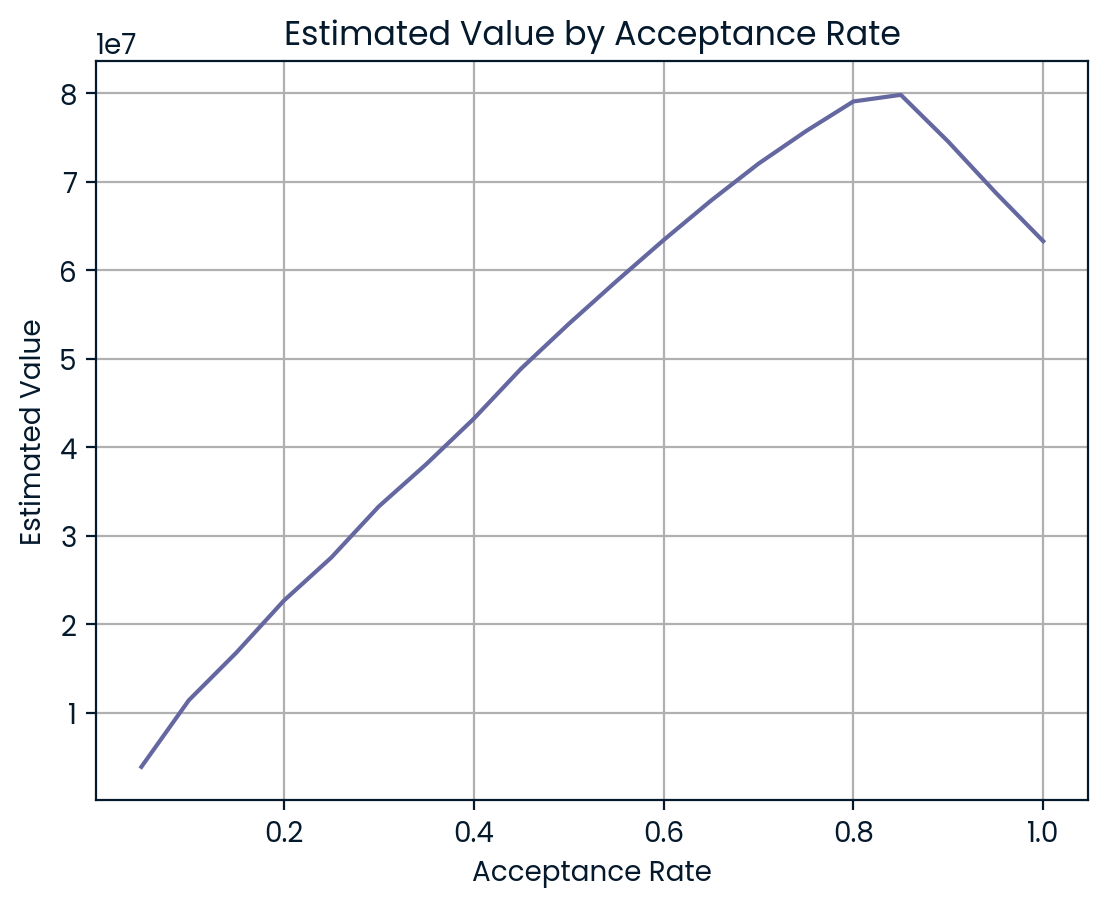

In [139]:
# Create a line plot of estimated value
plt.plot(strat_df['Acceptance Rate'],strat_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(True)
plt.show()

In [140]:
# Print the row with the max estimated value
print(strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])])

   Acceptance Rate  Threshold  ...  Avg Loan Amnt  Estimated Value
3             0.85      0.804  ...       9556.284     7.982693e+07

[1 rows x 6 columns]


### Total Expected Loss

Estimate the total expected loss based on the decisions made. The DataFrame `test_pred_df` contains the probability of default for each loan and the loan's value. Calculate the expected loss for each loan using these two values, then sum these individual losses to obtain the total expected loss.

For this calculation, assume the exposure is the full value of the loan and that the loss given default is 100%. This implies that a default on any loan results in a complete loss of the loan amount.

![tot_calc](https://raw.githubusercontent.com/sunpcy/Prachya-github/main/Project_credit_risk/images/tot_calc.png)

The DataFrame `test_pred_df` is available in the workspace for this analysis.


In [142]:
# Print the first five rows of the data frame
print(test_pred_df.head())

# Assume the loss given default is 100%
test_pred_df['loss_given_default'] = 1.0

# Calculate the bank's expected loss and assign it to a new column
test_pred_df['expected_loss'] = test_pred_df['prob_default'] * test_pred_df['loan_amnt'] * test_pred_df['loss_given_default']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))

   true_loan_status  prob_default  ...  pred_loan_status_15  pred_loan_status
0                 1      0.982387  ...                    1                 1
1                 1      0.975163  ...                    1                 1
2                 0      0.003474  ...                    0                 1
3                 0      0.005457  ...                    0                 1
4                 1      0.119876  ...                    0                 1

[5 rows x 5 columns]
Total expected loss:  $27,084,153.38
